# Clustering Yelp Restaurants

**Part 2: To be completed INDIVIDUALLY and due on March 3 at 7pm.**

In this assignment, we will continue to work with the [Yelp dataset](https://www.yelp.com/dataset/challenge) that we used in Homework 2-1.

We will continue to try to find culinary **districts** in Las Vegas. As a reminder from last time, these are characterized by **closeness** and **similarity** of restaurants. Use the "longitude" and "latitude" to cluster closeness.

However, in this analysis we will not use the Yelp-supplied "categories" to cluster for similarity as we did in Part 1. Instead, we will cluster the reviews themselves, extracting categories in an unsupervised fashion.  

Specifically, you are to use Latent Semantic Analysis (LSA) on the Yelp reviews to cluster restaurants based off on their reviews. As a reminder, LSA consists of using PCA applied to the document-term matrix.

Now, your feature vectors will contain latitude, longitude and the most relatively important review terms. 

You will apply PCA 3 times. Each time, you will take into account the first $k$ reviews per business, where $k = \{10,100,1000\}$. Many businesses will have less than $k$, or even no reviews. In this case, simply assign to the business the maximum number of reviews it has.
**(4 pts)**

### BU username: hxtong. Email: hxtong@bu.edu

In [1]:
import json

%matplotlib inline
%config InlineBackend.figure_format='retina'
# import libraries
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
#import slideUtilities as sl
#import laUtilities as ut
from importlib import reload
from datetime import datetime
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML
import sklearn.datasets as sk_data
import sklearn.metrics as metrics

#import matplotlib as mpl
import seaborn as sns
print('')

In [2]:
restaurant = {}
with open('dataset/business.json') as bus:
    for line in bus:
        dic = json.loads(line)
        if dic["city"]=="Las Vegas":
            if "Restaurants" in dic["categories"]:
#                 kk[dic["business_id"]] = 0
                restaurant[dic["business_id"]] = {"latitude":dic["latitude"], "longitude":dic["longitude"]}

df = pd.DataFrame.from_dict(restaurant, orient='index')
df.reset_index(level=0, inplace=True)
df.head()

index   latitude   longitude
0  --9e1ONYQuAa-CB_Rrw7Tw  36.123183 -115.169190
1  --q7kSBRb0vWC8lSkXFByA  36.016693 -115.173115
2  -153AjTW5luZPK4omEujWA  36.103001 -115.173516
3  -1m9o3vGRA8IBPNvNqKLmA  36.104330 -115.175593
4  -1vfRrlnNnNJ5boOVghMPA  36.281295 -115.286737

Text(0,0.5,'Scaled Longitude')

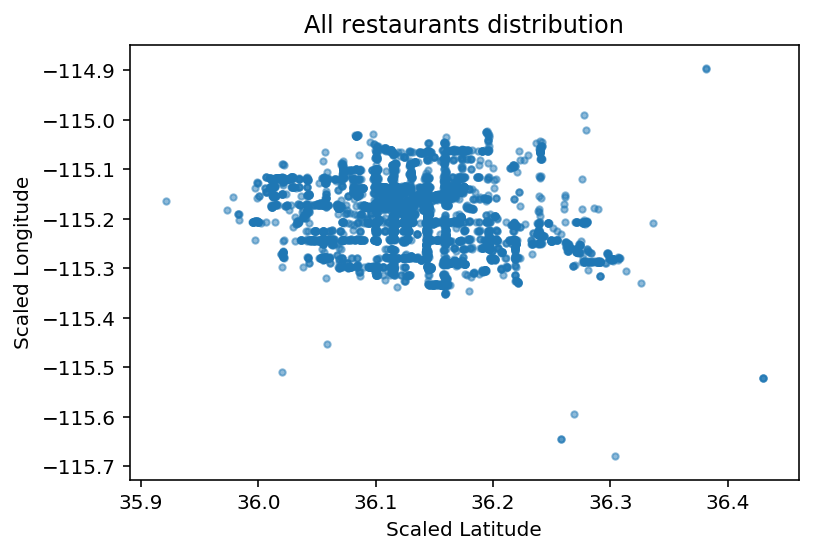

In [3]:
latitude = df.latitude
longitude = df.longitude
location = np.array(list(zip(latitude, longitude)))

plt.scatter(location[:, 0],location[:, 1], s=10, alpha = 0.5)
plt.title('All restaurants distribution')
plt.xlabel('Scaled Latitude')
plt.ylabel('Scaled Longitude')

In [4]:
from collections import defaultdict

review_dic = {}


with open('dataset/review.json') as f:
    for line in f:
        dic1 = json.loads(line) 
        if dic1["business_id"] in restaurant:
            if dic1["business_id"] in review_dic:
                review_dic[dic1["business_id"]].append((dic1["text"]))
            else:
                review_dic[dic1["business_id"]] = [dic1["text"]]    



In [5]:
print(len(review_dic))
print(len(review_dic['zpoZ6WyQUYff18-z4ZU1mA']))

review10_dic = {}
review10_str = {}
review100_dic = {}
review100_str = {}
review1000_dic = {}
review1000_str = {}
for key in review_dic:
    m10 = min(len(review_dic[key]), 10)
    m100 = min(len(review_dic[key]), 100)
    m1000 = min(len(review_dic[key]), 1000)

    review10_dic[key] = review_dic[key][:m10]
    review10_str[key] = ' '.join(review10_dic[key])
    review100_dic[key] = review_dic[key][:m100]  
    review100_str[key] = ' '.join(review100_dic[key])
    review1000_dic[key] = review_dic[key][:m1000] 
    review1000_str[key] = ' '.join(review1000_dic[key])
        

5899
547


In [6]:
# create separate lists of business_id, latitude, longitude and review, with the same ordering
business_id = []
latitude = []
longitude = []
review10 = []
review100 = []
review1000 = []

for key,val in restaurant.items():
    business_id.append(key)
    latitude.append(val.get('latitude'))
    longitude.append(val.get('longitude'))
    review10.append(review10_str[key])
    review100.append(review100_str[key])
    review1000.append(review1000_str[key])

latitude = np.array(latitude)
longitude = np.array(longitude)

In [7]:
# strip digits from all reviews
from string import digits
remove_digits = str.maketrans("", "", digits)
review10 = [rev.translate(remove_digits) for rev in review10]
review100 = [rev.translate(remove_digits) for rev in review100]
review1000 = [rev.translate(remove_digits) for rev in review1000]

print(len(review10))

5899


In [8]:
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize


review10 = [" ".join(SnowballStemmer("english", ignore_stopwords=True).stem(word)  
         for sent in sent_tokenize(message)
        for word in word_tokenize(sent))
        for message in review10]


In [9]:
review100 = [" ".join(SnowballStemmer("english", ignore_stopwords=True).stem(word)  
         for sent in sent_tokenize(message)
        for word in word_tokenize(sent))
        for message in review100]



KeyboardInterrupt: 

In [ ]:
review1000 = [" ".join(SnowballStemmer("english", ignore_stopwords=True).stem(word)  
         for sent in sent_tokenize(message)
        for word in word_tokenize(sent))
        for message in review1000]

In [185]:
from sklearn.feature_extraction.text import TfidfVectorizer
# min_df=4,max_df=0.8
# max_df=0.18, min_df=0.009
vectorizer = TfidfVectorizer(min_df=0.009,max_df=0.18, stop_words='english', sublinear_tf=True,use_idf=True)
DataReview10 = vectorizer.fit_transform(review10)
terms10 = vectorizer.get_feature_names()

print(type(DataReview10), DataReview10.shape)
# terms10 = vectorizer.get_feature_names()

<class 'scipy.sparse.csr.csr_matrix'> (5899, 2591)


In [194]:
DataReview100 = vectorizer.fit_transform(review100)
terms100 = vectorizer.get_feature_names()

print(type(DataReview100), DataReview100.shape)

<class 'scipy.sparse.csr.csr_matrix'> (5899, 7982)


In [211]:
DataReview1000 = vectorizer.fit_transform(review1000)
terms1000 = vectorizer.get_feature_names()

print(type(DataReview1000), DataReview1000.shape)

<class 'scipy.sparse.csr.csr_matrix'> (5899, 12465)


In [186]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
# select 100 to apply to SVD
lsa = TruncatedSVD(100, algorithm = 'arpack')
review_lsa10 = lsa.fit_transform(DataReview10)
review_lsa10 = Normalizer(copy=False).fit_transform(review_lsa10)


In [195]:
lsa = TruncatedSVD(100, algorithm = 'arpack')
review_lsa100 = lsa.fit_transform(DataReview100)
review_lsa100 = Normalizer(copy=False).fit_transform(review_lsa100)


In [212]:
lsa = TruncatedSVD(100, algorithm = 'arpack')
review_lsa1000 = lsa.fit_transform(DataReview1000)
review_lsa1000 = Normalizer(copy=False).fit_transform(review_lsa1000)

In [74]:
location = 1000 * Normalizer(copy=False).fit_transform(np.column_stack((latitude, longitude)))

feature10 = np.concatenate((review_lsa10, location), axis=1)

In [196]:
feature100 = np.concatenate((review_lsa100, location), axis=1)

In [213]:
feature1000 = np.concatenate((review_lsa1000, location), axis=1)

Find clusters using the 3 different techniques we discussed in class: k-means++, hierarchical, and GMM for **each** of the 3 feature vectors per business (remember you created feature vectors based on $k = \{10,100,1000\}$). Visualize the clusters by plotting the longitude/latitude of the restaurants in a scatter plot and label each cluster. 

Note that to label each cluster, you will need to think about how to extract labels from the LSA results.
**(4 pts)**

# K=10: first 10 reviews per business

# K-Means++ clusters

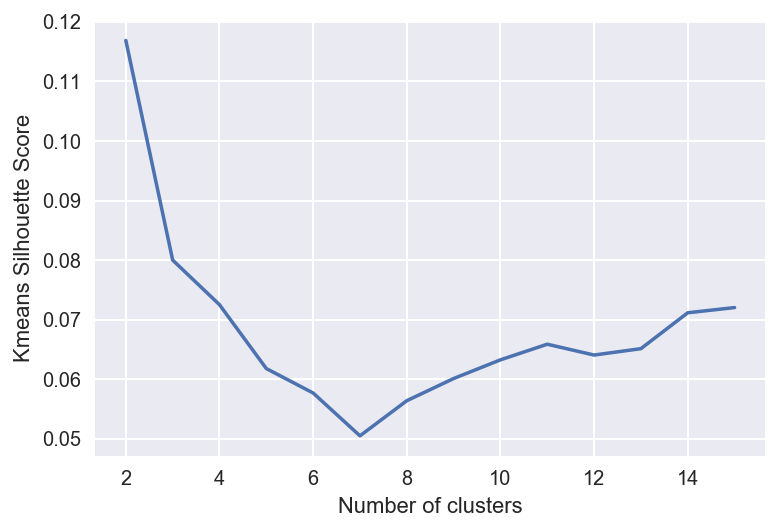

In [187]:
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
import seaborn as sns; sns.set()  # for plot styling

max_clusters = 15
s = np.zeros(max_clusters+1)

for k in range(2,max_clusters+1):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
    kmeans.fit_predict(feature10)
    labels = kmeans.fit_predict(feature10)
    s[k] = metrics.silhouette_score(feature10,labels,metric='euclidean')

plt.plot(range(2,len(s)),s[2:])
plt.xlabel('Number of clusters')
plt.ylabel('Kmeans Silhouette Score')
plt.show()

In [76]:
# select k=5 to cluster
k_K10 = 5

kmeans = KMeans(init='k-means++', n_clusters=k_K10, n_init=10)
K_labels10 = kmeans.fit_predict(feature10)
K_centroids10 = kmeans.cluster_centers_

K_dic10 = {}
for i in K_labels10:
    if i in K_dic10:
        K_dic10[i] += 1
    else:
        K_dic10[i] = 1
        
# print(K_dic10)
for i in range(k_K10):
    print('There are {} restautrants in cluster {}. '.format(K_dic10[i], i))

There are 795 restautrants in cluster 0. 
There are 1070 restautrants in cluster 1. 
There are 481 restautrants in cluster 2. 
There are 1184 restautrants in cluster 3. 
There are 2369 restautrants in cluster 4. 


In [83]:
K_centroids10 = kmeans.cluster_centers_
K_ori_centers10 = lsa.inverse_transform(K_centroids10[:,:100])
K_order_centroids10 = K_ori_centers10.argsort()[:, ::-1]

print("Top words in each cluster by using K-means method:")
print('')

# print out the top 50 words with largest weight in each cluster
for i in range(k_K10):
    print("Top 50 words in Cluster {}: ".format(i))
    for ind in K_order_centroids10[i, :50]:
#         print('Top category is {}'.format(terms10[ind]))
        print(' %s' % terms10[ind], end='')
    print("")
    print("")    

Top words in each cluster by using K-means method:

Top 50 words in Cluster 0: 
 noodl sushi chines thai bowl tea asian korean broth pho japanes curri tofu chef authent pad spring tempura ayc seafood chow bbq crab veget ramen tuna salmon pot mein miso duck steam dumpl panda teriyaki wonton sour orang entre sashimi china express vietnames waiter soy chinatown pepper spice bland mongolian

Top 50 words in Cluster 1: 
 wing taco bartend garlic bowl beer bbq deliveri game crust sushi ingredi sub play burrito readi bacon phone greet wrap chip tea consist coffe tomato month stick healthi job subway pepper welcom lol deliv joint combo box normal noodl cashier choos ad italian kitchen cut car sausag dip fact suggest

Top 50 words in Cluster 2: 
 taco mexican salsa burrito asada carn chip tortilla enchilada guacamol authent roberto pastor carnita nacho quesadilla margarita el al torta chile corn fajita cilantro pico horchata relleno sour shred chipotl tamal spanish bell la guac cevich verd blan

#### So From top 50 words in each cluster, we can selects several key words as their labels.
#### Cluster 0 : noodles, sushi, Chinese
#### Cluster 1 : wings, taco, BBQ
#### Cluster 2 : Mexican, salsa, burrito
#### Cluster 3 : downtown, beer, bacon
#### Cluster 4 : coffee, wine, Italian

Text(0,0.5,'Longitude')

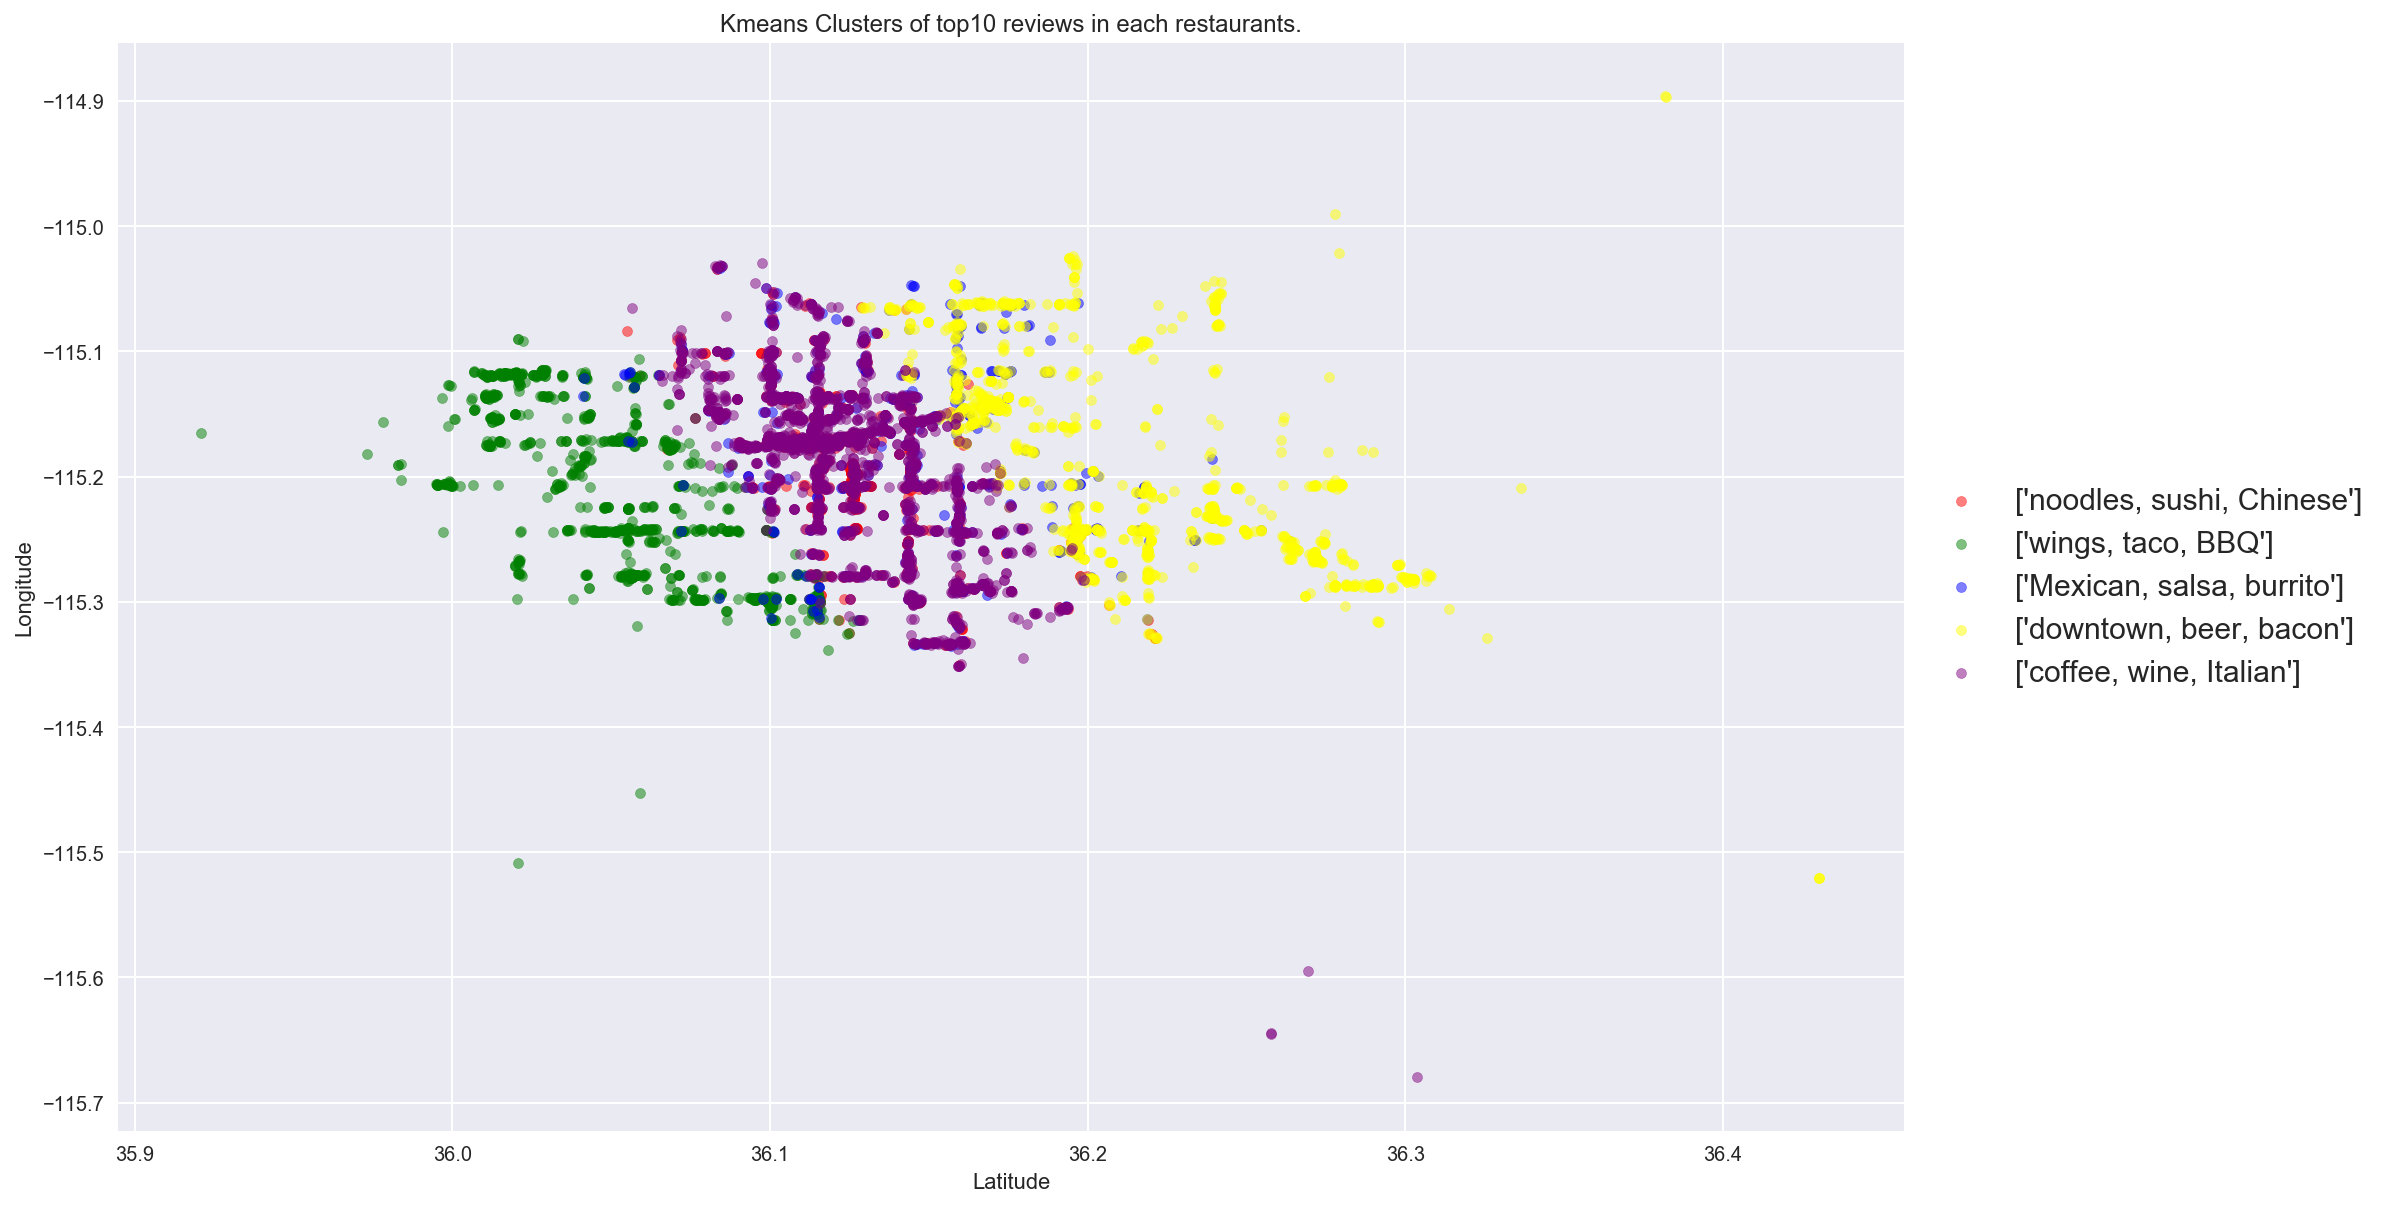

In [86]:
K_cluster10_top = [['noodles, sushi, Chinese'],['wings, taco, BBQ'],['Mexican, salsa, burrito'],['downtown, beer, bacon'],['coffee, wine, Italian']]

c = ['r', 'g', 'blue', 'yellow', 'purple','darkseagreen','dimgray' ,  'pink','brown','orange','beige','darkturquoise']

plt.figure(figsize=(16,10))

for i in range(k_K10):
    plt.scatter(latitude[K_labels10==i], longitude[K_labels10==i], s=25, color=c[i], label=K_cluster10_top[i] ,alpha=0.5)
#     points = np.array([location[j] for j in range(len(location)) if K_labels[j] == i])
#     plt.scatter(points[:, 0], points[:, 1], s=10, c=c[i], alpha = 0.5)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 15})
plt.title('Kmeans Clusters of top10 reviews in each restaurants.')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# Hierarchical clusters

Text(0,0.5,'Hierarchy Silhouette Score')

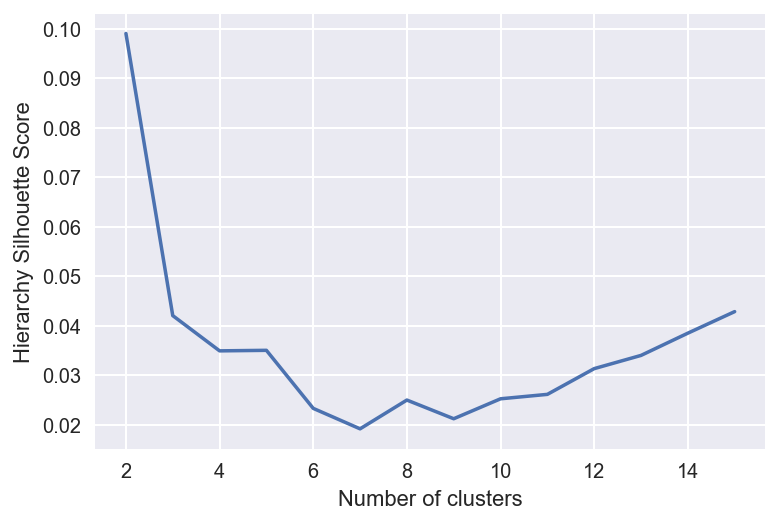

In [89]:
import scipy.cluster
import scipy.cluster.hierarchy as hierarchy
import scipy.spatial.distance

H_Z10 = hierarchy.linkage(feature10, method='ward', metric='euclidean')

s = np.zeros(max_clusters+1)
for k in range(2,max_clusters+1):
    clusters = hierarchy.fcluster(H_Z10, k, criterion='maxclust')
    s[k] = metrics.silhouette_score(feature10,clusters,metric='euclidean')
plt.plot(range(2,len(s)),s[2:])
plt.xlabel('Number of clusters')
plt.ylabel('Hierarchy Silhouette Score')

In [90]:
k_H10 = 5
clusters10 = hierarchy.fcluster(H_Z10, k_H10, criterion='maxclust')

H_dic10 = {}
for i in clusters10:
    if i in H_dic10:
        H_dic10[i] += 1
    else:
        H_dic10[i] = 1
        
for i in range(1,k_H10+1):
    print('There are {} restautrants in cluster {}. '.format(H_dic10[i], i))

There are 1151 restautrants in cluster 1. 
There are 489 restautrants in cluster 2. 
There are 3290 restautrants in cluster 3. 
There are 330 restautrants in cluster 4. 
There are 639 restautrants in cluster 5. 


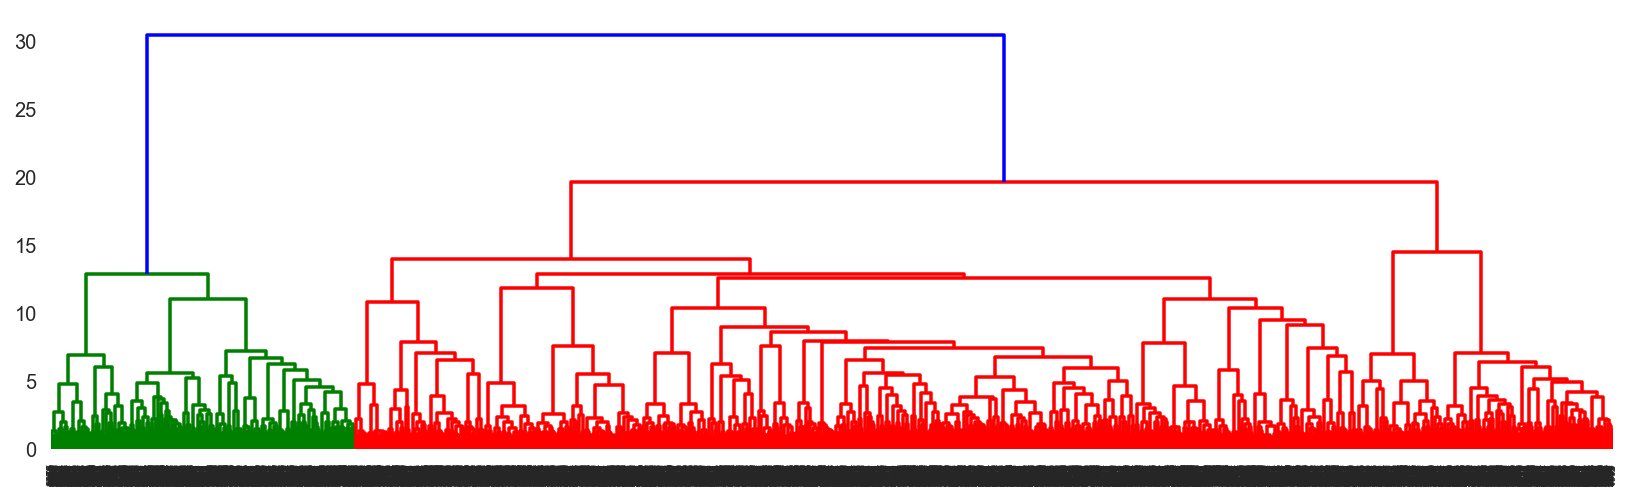

In [91]:
plt.figure(figsize=(14,4))
H_figure = hierarchy.dendrogram(H_Z10,  truncate_mode='level', show_leaf_counts=True)

In [103]:
# Calculate the centroids in each cluster
cluster_H10 = {}
sum_H10 = []
H_centroids10 = []
sum_HH10 =  np.zeros(102)
for i in range(k_H10):
    cluster_H10[i] = np.array([feature10[j] for j in range(len(location)) if clusters10[j] == i+1])
    for k in range(len(cluster_H10[i])):
        sum_HH10 = list(map(lambda x: x[0]+x[1], zip(sum_HH10, cluster_H10[i][k]))) 
    sum_H10.append(sum_HH10)
    center =  [(sum_HH10[j]/len(cluster_H10[i])) for j in range(len(sum_HH10))] 
    H_centroids10.append(center)

H_centroids10 = np.array(H_centroids10)
H_ori_centers10 = lsa.inverse_transform(H_centroids10[:,:100])
H_order_centroids10 = H_ori_centers10.argsort()[:, ::-1]

print("Top words in each cluster by using Hierarchical method:")
print('')

# print out the top 50 words with largest weight in each cluster
for i in range(k_H10):
    print("Top 50 words in Cluster {}: ".format(i+1))
    for ind in H_order_centroids10[i, :50]:
        print(' %s' % terms10[ind], end='')
    print("")
    print("")    

Top words in each cluster by using Hierarchical method:

Top 50 words in Cluster 1: 
 taco mexican burrito salsa asada carn chip bartend beer tortilla truck downtown el wing bacon bbq rib corn cashier mac play authent pull job readi toast window car card game greet pancak french kitchen tomato combo lol coffe anyon sign la stand pastor man month phone waiter sad attitud fact

Top 50 words in Cluster 2: 
 chines taco noodl thai mexican burrito authent salsa asada deliveri curri bbq sour chip carn pad tea wing bowl chow orang beer bartend rib pepper downtown bland kitchen panda readi cashier waiter deliv mein tortilla truck entre combo express corn bacon greet job rate eaten play garlic el asian anyon

Top 50 words in Cluster 3: 
 beer taco wing bartend noodl chines bbq waiter coffe bowl bacon garlic sushi hotel deliveri tea rib chef casino play buffet authent chip combo job expens music readi pepper deliv kitchen tomato group sub grab short cut wine game card cashier greet man entre fac

#### From top 50 words in each cluster, we can selects several key words as their labels.
#### Cluster 0 : taco, Mexican, burrito
#### Cluster 1 : Chinese, noodles, Thai
#### Cluster 2 : beer, wings, BBQ
#### Cluster 3 : Mexican, bowl, sushi
#### Cluster 4 : taco, chip, coffee

Text(0,0.5,'Longitude')

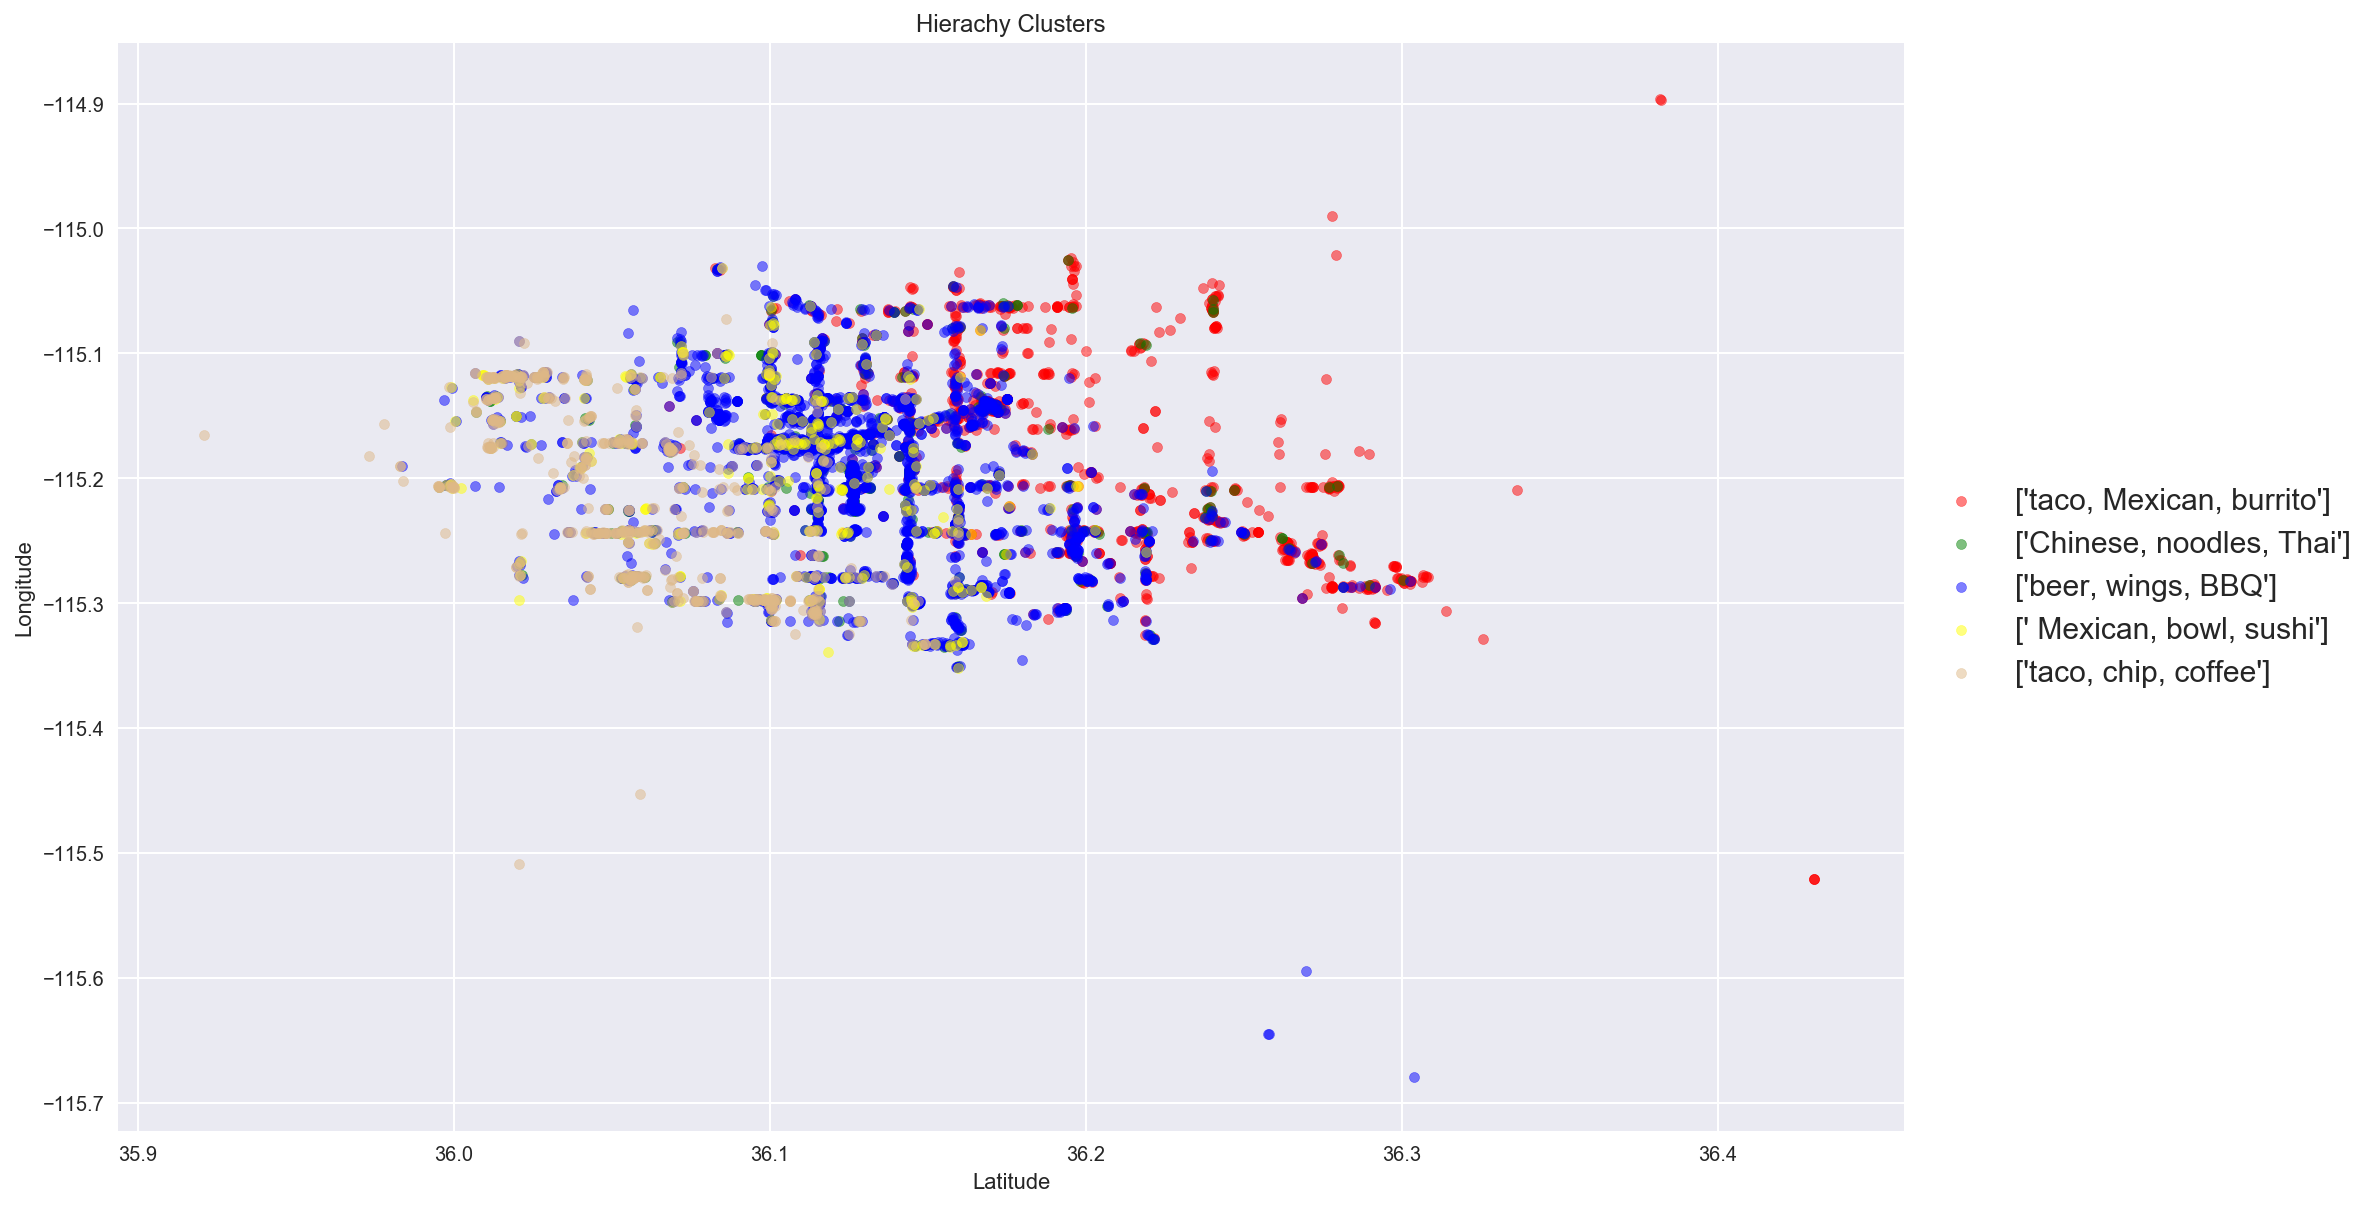

In [108]:
H_cluster10_top = [['taco, Mexican, burrito'],['Chinese, noodles, Thai'],['beer, wings, BBQ'],[' Mexican, bowl, sushi'],['taco, chip, coffee']]
c = ['r', 'g', 'blue', 'yellow', 'burlywood','darkseagreen', 'beige', 'pink', 'orange','dimgray','brown']

plt.figure(figsize=(16,10))
for i in range(k_H10):
    plt.scatter(latitude[clusters10==i+1], longitude[clusters10==i+1], s=25, color=c[i],label=H_cluster10_top[i], alpha=0.5)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 15})
plt.title('Hierachy Clusters')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# GMM clusters

Text(0,0.5,'GMM Silhouette Score')

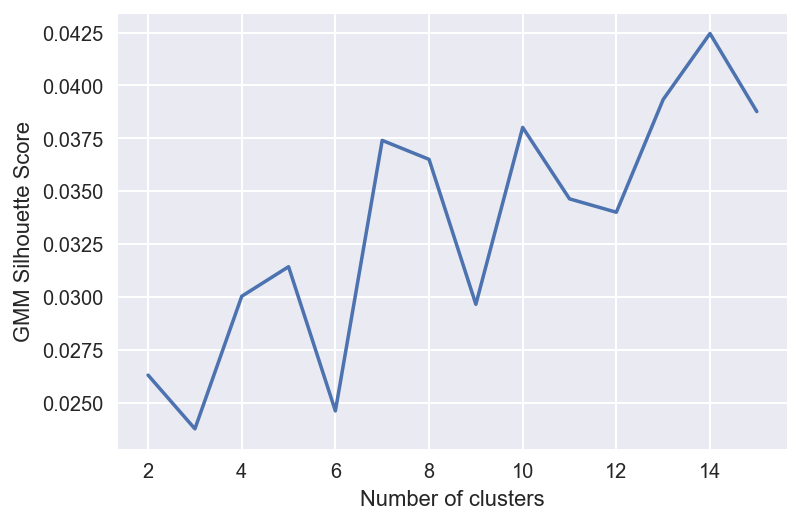

In [189]:
s = np.zeros(max_clusters+1)
for k in range(2,max_clusters+1):
    gmm = mixture.GaussianMixture(n_components=k, covariance_type='full')
    gmm.fit(feature10)
    y_pred = gmm.predict(feature10)
    s[k] = metrics.silhouette_score(feature10,y_pred,metric='euclidean')
plt.plot(range(2,len(s)),s[2:])
plt.xlabel('Number of clusters')
plt.ylabel('GMM Silhouette Score')

In [193]:
k_G10 = 5
gmm = mixture.GaussianMixture(n_components=k_G10, covariance_type='tied')
gmm.fit(feature10)
y_pred10 = gmm.predict(feature10)

G_dic10 = {}
for i in y_pred10:
    if i in G_dic10:
        G_dic10[i] += 1
    else:
        G_dic10[i] = 1
        
for i in range(k_G10):
    print('There are {} restautrants in cluster {}. '.format(G_dic10[i], i))

There are 3293 restautrants in cluster 0. 
There are 537 restautrants in cluster 1. 
There are 529 restautrants in cluster 2. 
There are 511 restautrants in cluster 3. 
There are 1029 restautrants in cluster 4. 


In [191]:
# Calculate the centroids in each cluster
cluster_G10 = {}
sum_G10 = []
G_centroids10 = []
sum_GG10 =  np.zeros(102)
for i in range(k_G10):
    cluster_G10[i] = np.array([feature10[j] for j in range(len(location)) if y_pred10[j] == i])
    for k in range(len(cluster_G10[i])):
        sum_GG10 = list(map(lambda x: x[0]+x[1], zip(sum_GG10, cluster_G10[i][k]))) 
    sum_G10.append(sum_GG10)
    center =  [(sum_GG10[j]/len(cluster_G10[i])) for j in range(len(sum_GG10))] 
    G_centroids10.append(center)

G_centroids10 = np.array(G_centroids10)
G_ori_centers10 = lsa.inverse_transform(G_centroids10[:,:100])
G_order_centroids10 = G_ori_centers10.argsort()[:, ::-1]

print("Top words in each cluster by using GMM method:")
print('')

# print out the top 50 words with largest weight in each cluster
for i in range(k_G10):
    print("Top 50 words in Cluster {}: ".format(i))
    for ind in G_order_centroids10[i, :50]:
        print(' %s' % terms10[ind], end='')
    print("")
    print("") 

Top words in each cluster by using GMM method:

Top 50 words in Cluster 0: 
 sushi noodl thai curri chines bowl korean pho tea japanes broth ayc chef pad tempura tofu asian tuna authent ramen salmon miso spring sashimi spice crab seafood bbq veget vietnames indian pot duck waiter sake buffet garlic dumpl kimchi nigiri group bland entre belli steam cuisin level varieti chinatown soy

Top 50 words in Cluster 1: 
 sushi noodl subway thai sub bowl curri chines tea korean pho tuna japanes broth chef ayc pad asian tofu tempura authent salmon ramen miso veget spring spice bbq ingredi sashimi crab seafood smoothi cut pepper wrap vietnames healthi expens varieti indian satisfi pot sake duck greet waiter compar buffet turkey

Top 50 words in Cluster 2: 
 wing beer bartend garlic sushi bbq bowl noodl deliveri chines waiter chef bacon coffe tea rib hotel deliv casino play crust pepper expens italian music buffet readi wine kitchen tomato game ingredi group entre sub toast cut cake cafe pasta greet

#### From top 50 words in each cluster, we can selects several key words as their labels.
#### Cluster 0 : sushi, wine, lobster
#### Cluster 1 : taco, Mexican, salsa
#### Cluster 2 : beer, noodle, Chinese
#### Cluster 3 : taco, chip, coffee
#### Cluster 4 : wings, bacon, BBQ

Text(0,0.5,'Longitude')

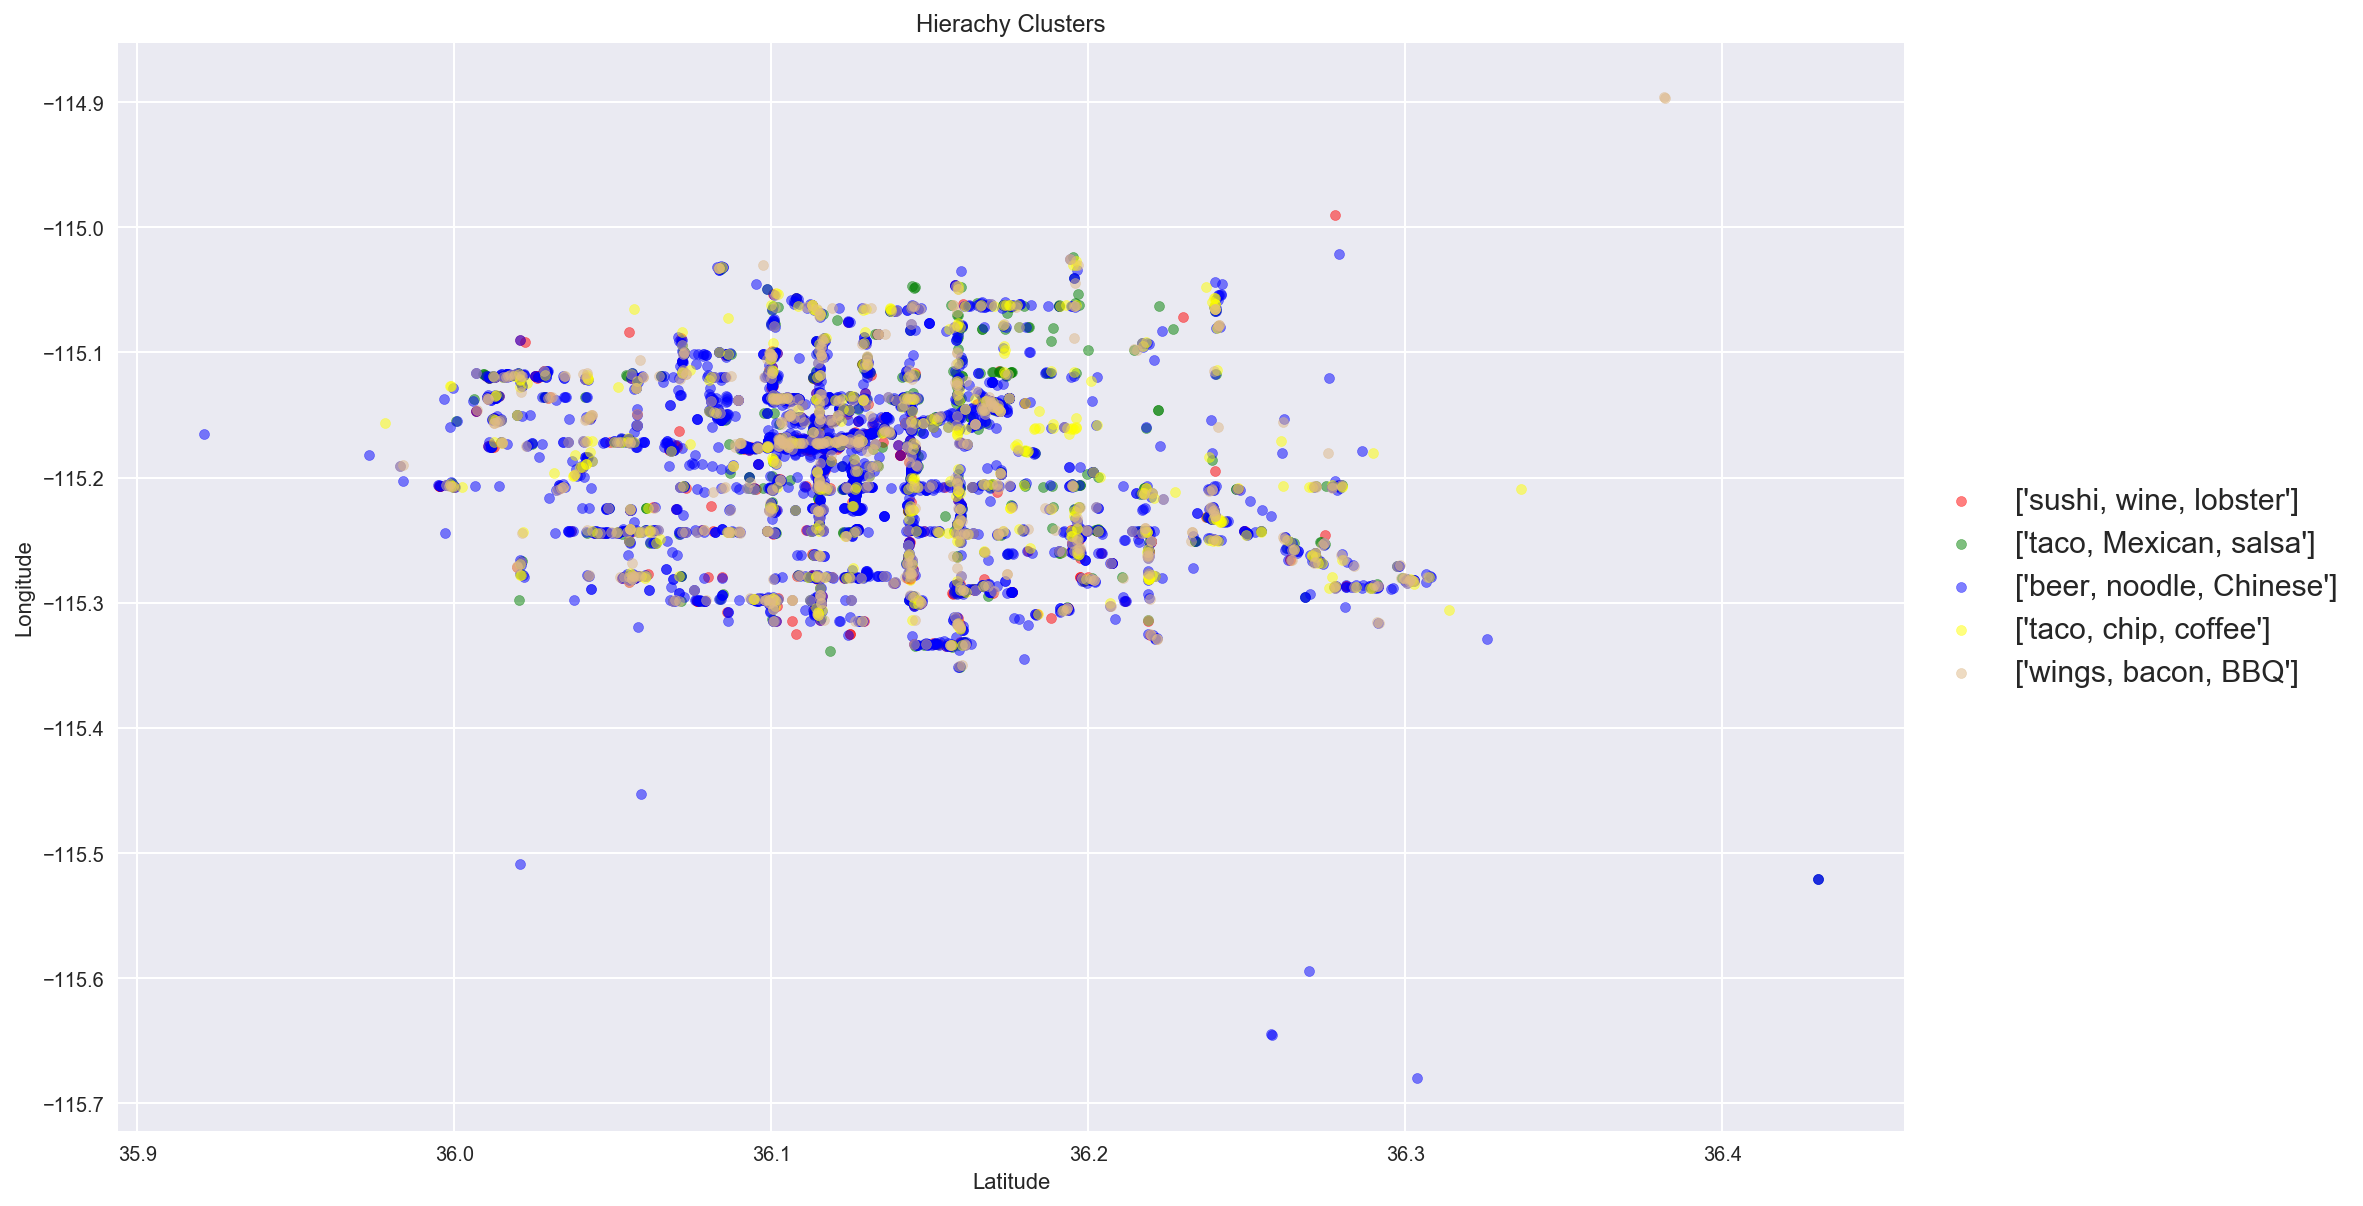

In [118]:
G_cluster10_top = [['sushi, wine, lobster'],['taco, Mexican, salsa'],['beer, noodle, Chinese'],['taco, chip, coffee'],['wings, bacon, BBQ']]
c = ['r', 'g', 'blue', 'yellow', 'burlywood','darkseagreen', 'beige', 'pink', 'orange','dimgray','brown']

plt.figure(figsize=(16,10))
for i in range(k_G10):
    plt.scatter(latitude[y_pred10==i], longitude[y_pred10==i], s=25, color=c[i],label=G_cluster10_top[i], alpha=0.5)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 15})
plt.title('GMM Clusters')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# K=100: first 100 reviews per business

# K-Means++ clusters

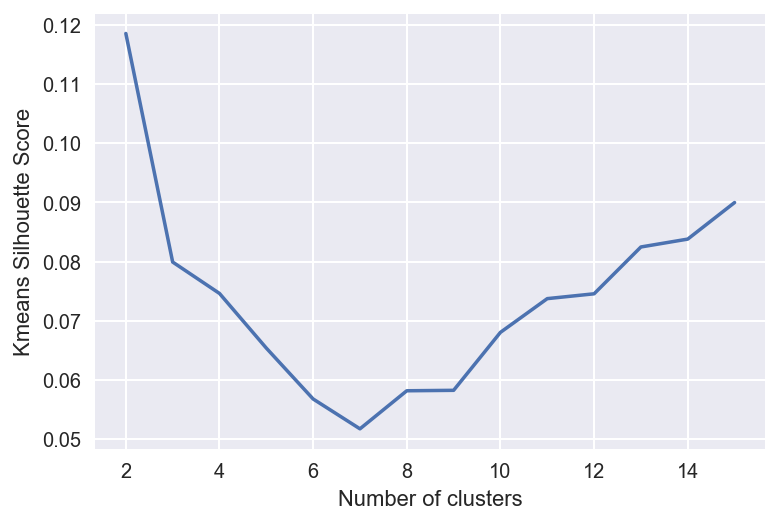

In [197]:
max_clusters = 15
s = np.zeros(max_clusters+1)

for k in range(2,max_clusters+1):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
    kmeans.fit_predict(feature100)
    labels = kmeans.fit_predict(feature100)
    s[k] = metrics.silhouette_score(feature100,labels,metric='euclidean')

plt.plot(range(2,len(s)),s[2:])
plt.xlabel('Number of clusters')
plt.ylabel('Kmeans Silhouette Score')
plt.show()

In [198]:
# select k=5 to cluster
k_K100 = 5

kmeans = KMeans(init='k-means++', n_clusters=k_K100, n_init=10)
K_labels100 = kmeans.fit_predict(feature100)
K_centroids100 = kmeans.cluster_centers_

K_dic100 = {}
for i in K_labels100:
    if i in K_dic100:
        K_dic100[i] += 1
    else:
        K_dic100[i] = 1
        
# print(K_dic10)
for i in range(k_K100):
    print('There are {} restautrants in cluster {}. '.format(K_dic100[i], i))

There are 458 restautrants in cluster 0. 
There are 1207 restautrants in cluster 1. 
There are 1058 restautrants in cluster 2. 
There are 836 restautrants in cluster 3. 
There are 2340 restautrants in cluster 4. 


In [199]:
K_centroids100 = kmeans.cluster_centers_
K_ori_centers100 = lsa.inverse_transform(K_centroids100[:,:100])
K_order_centroids100 = K_ori_centers100.argsort()[:, ::-1]

print("Top words in each cluster by using K-means method:")
print('')

# print out the top 50 words with largest weight in each cluster
for i in range(k_K100):
    print("Top 50 words in Cluster {}: ".format(i))
    for ind in K_order_centroids100[i, :50]:
#         print('Top category is {}'.format(terms10[ind]))
        print(' %s' % terms100[ind], end='')
    print("")
    print("") 

Top words in each cluster by using K-means method:

Top 50 words in Cluster 0: 
 asada carne tortillas burritos guacamole pastor carnitas enchiladas el tortilla nachos salsas quesadilla enchilada roberto chile horchata al guac cilantro pico fajitas torta spanish margaritas shredded relleno verde refried mexico robertos chorizo lengua ceviche queso margarita chipotle gallo menudo pollo quesadillas taquitos tamales chimichanga tostada tortas lime los mex flour

Top 50 words in Cluster 1: 
 downtown subway pizzas fremont mac pepperoni truck refund pie ribs bell fingers mcdonald subs dogs driver gravy el sticks jack corporate cheeseburger coupons container messed hash dough buffalo mustard pancakes rings nachos hawaiian gas oven smoke coke trash teriyaki ketchup shake philly burritos pull cars patty chicago bartenders pickles vegan

Top 50 words in Cluster 2: 
 subway pizzas pepperoni mac bartenders fingers sushi buffalo teriyaki pie philly nachos bell refund groupon subs bowls thai games 

#### From top 50 words in each cluster, we can selects several key words as their labels.
#### Cluster 0 : burritos, nachos, Mexican
#### Cluster 1 : pizzas, pie, burgers
#### Cluster 2 : subway, fingers, meatballs
#### Cluster 3 : sushi, Japanese, Chinese
#### Cluster 4 : lobster, brunch, pancakes

Text(0,0.5,'Longitude')

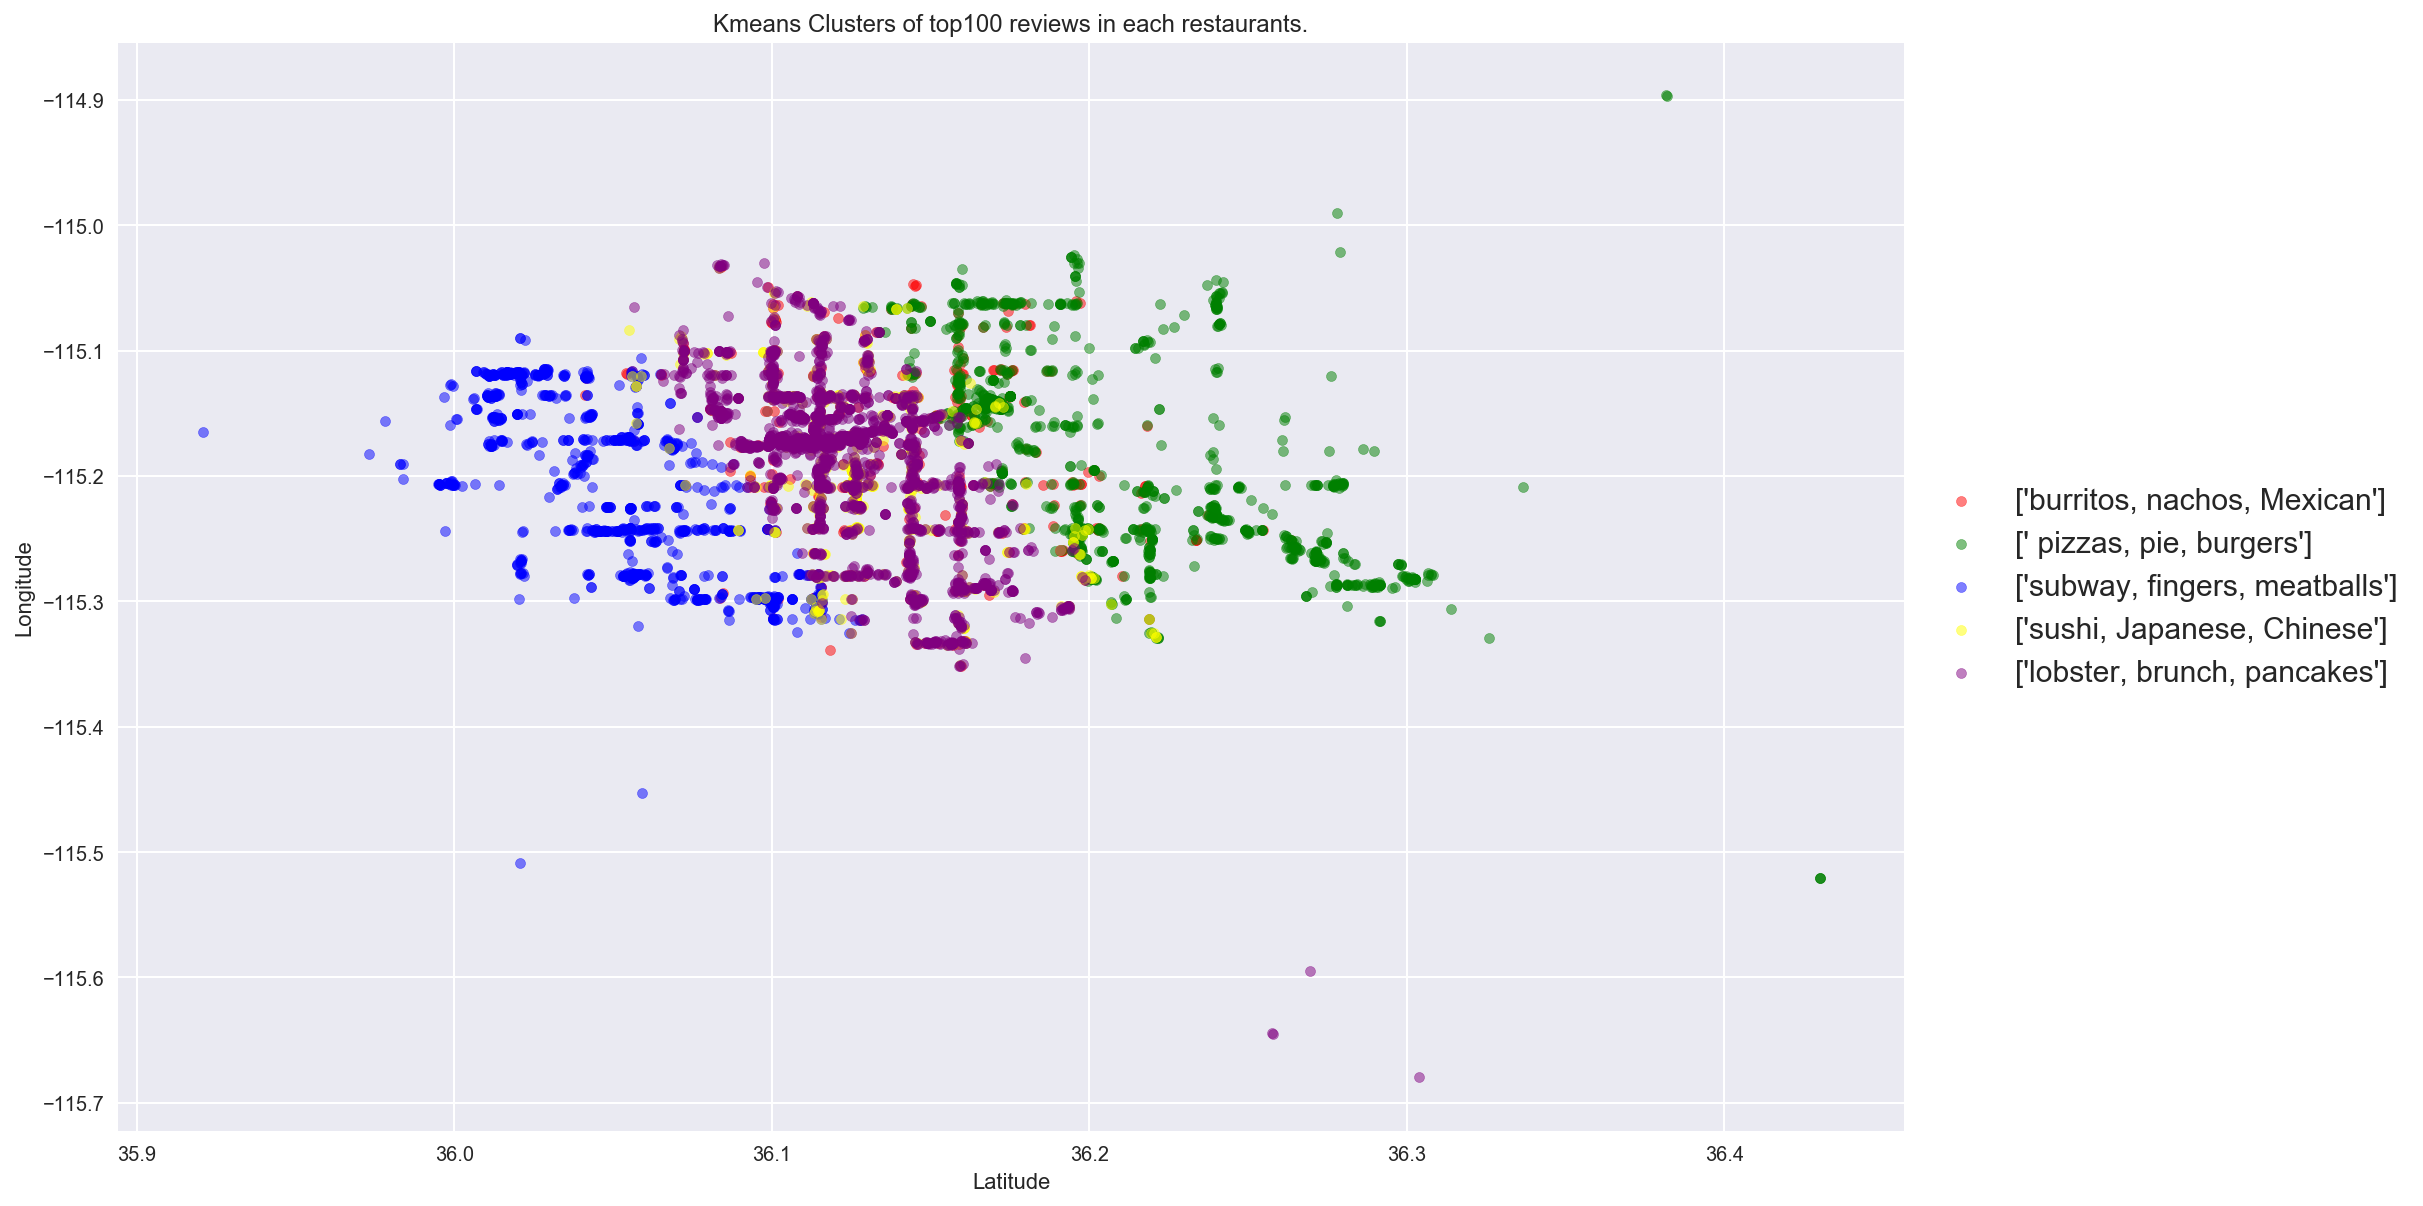

In [200]:
K_cluster100_top = [['burritos, nachos, Mexican'],[' pizzas, pie, burgers'],['subway, fingers, meatballs'],['sushi, Japanese, Chinese'],['lobster, brunch, pancakes']]

c = ['r', 'g', 'blue', 'yellow', 'purple','darkseagreen','dimgray' ,  'pink','brown','orange','beige','darkturquoise']

plt.figure(figsize=(16,10))

for i in range(k_K100):
    plt.scatter(latitude[K_labels100==i], longitude[K_labels100==i], s=25, color=c[i], label=K_cluster100_top[i] ,alpha=0.5)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 15})
plt.title('Kmeans Clusters of top100 reviews in each restaurants.')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# Hierarchical clusters

Text(0,0.5,'Hierarchy Silhouette Score')

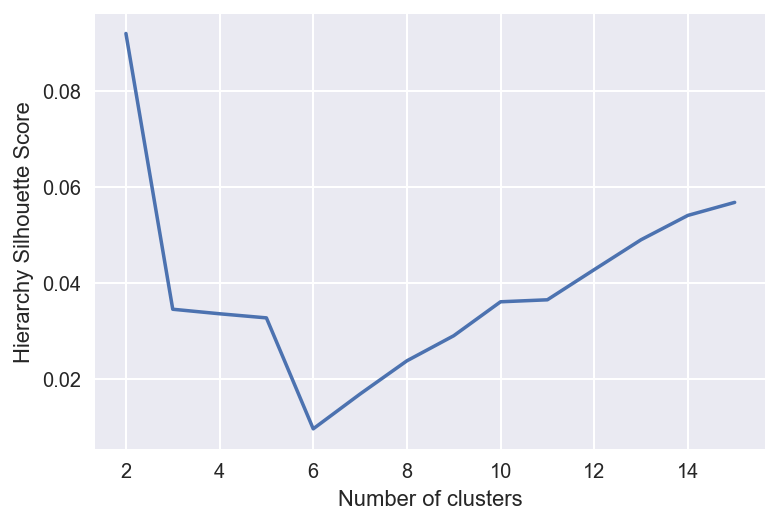

In [201]:
H_Z100 = hierarchy.linkage(feature100, method='ward', metric='euclidean')

s = np.zeros(max_clusters+1)
for k in range(2,max_clusters+1):
    clusters = hierarchy.fcluster(H_Z100, k, criterion='maxclust')
    s[k] = metrics.silhouette_score(feature100,clusters,metric='euclidean')
plt.plot(range(2,len(s)),s[2:])
plt.xlabel('Number of clusters')
plt.ylabel('Hierarchy Silhouette Score')

In [204]:
k_H100 = 5
clusters100 = hierarchy.fcluster(H_Z100, k_H100, criterion='maxclust')

H_dic100 = {}
for i in clusters100:
    if i in H_dic100:
        H_dic100[i] += 1
    else:
        H_dic100[i] = 1
        
for i in range(1,k_H100+1):
    print('There are {} restautrants in cluster {}. '.format(H_dic100[i], i))

There are 403 restautrants in cluster 1. 
There are 463 restautrants in cluster 2. 
There are 835 restautrants in cluster 3. 
There are 951 restautrants in cluster 4. 
There are 3247 restautrants in cluster 5. 


In [205]:
# Calculate the centroids in each cluster
cluster_H100 = {}
sum_H100 = []
H_centroids100 = []
sum_HH100 =  np.zeros(102)
for i in range(k_H100):
    cluster_H100[i] = np.array([feature100[j] for j in range(len(location)) if clusters100[j] == i+1])
    for k in range(len(cluster_H100[i])):
        sum_HH100 = list(map(lambda x: x[0]+x[1], zip(sum_HH100, cluster_H100[i][k]))) 
    sum_H100.append(sum_HH100)
    center =  [(sum_HH100[j]/len(cluster_H100[i])) for j in range(len(sum_HH100))] 
    H_centroids100.append(center)

H_centroids100 = np.array(H_centroids100)
H_ori_centers100 = lsa.inverse_transform(H_centroids100[:,:100])
H_order_centroids100 = H_ori_centers100.argsort()[:, ::-1]

print("Top words in each cluster by using Hierarchical method:")
print('')

# print out the top 50 words with largest weight in each cluster
for i in range(k_H100):
    print("Top 50 words in Cluster {}: ".format(i+1))
    for ind in H_order_centroids100[i, :50]:
        print(' %s' % terms100[ind], end='')
    print("")
    print("")    

Top words in each cluster by using Hierarchical method:

Top 50 words in Cluster 1: 
 asada carne el pastor tortillas burritos carnitas horchata guacamole al salsas enchiladas tortilla roberto spanish nachos quesadilla torta chile lengua cilantro ceviche los mexico enchilada muy robertos que pollo chorizo verde pico menudo shredded refried guac tamales tortas relleno en comida tostada agua es gordo empanadas taqueria quesadillas taquitos gallo

Top 50 words in Cluster 2: 
 asada carne el tortillas burritos pastor truck guacamole tortilla nachos carnitas horchata al downtown quesadilla spanish salsas roberto enchiladas cilantro chile pollo torta pico ceviche los shredded lengua mexico chorizo enchilada que robertos guac muy verde mac trucks tamales refried chipotle bartenders tostada relleno tortas menudo pizzas fremont empanadas lime

Top 50 words in Cluster 3: 
 asada carne burritos tortillas guacamole nachos tortilla el carnitas quesadilla enchiladas truck pastor chipotle cilantro sa

#### From top 50 words in each cluster, we can selects several key words as their labels.
#### Cluster 1 : burritos, Mexican, nachos
#### Cluster 2 : carne, pizzas, Spanish
#### Cluster 3 : fingers, sushi, downtown
#### Cluster 4 : Thai, tofu, Japanese
#### Cluster 5 : subway, noodles, pancakes

Text(0,0.5,'Longitude')

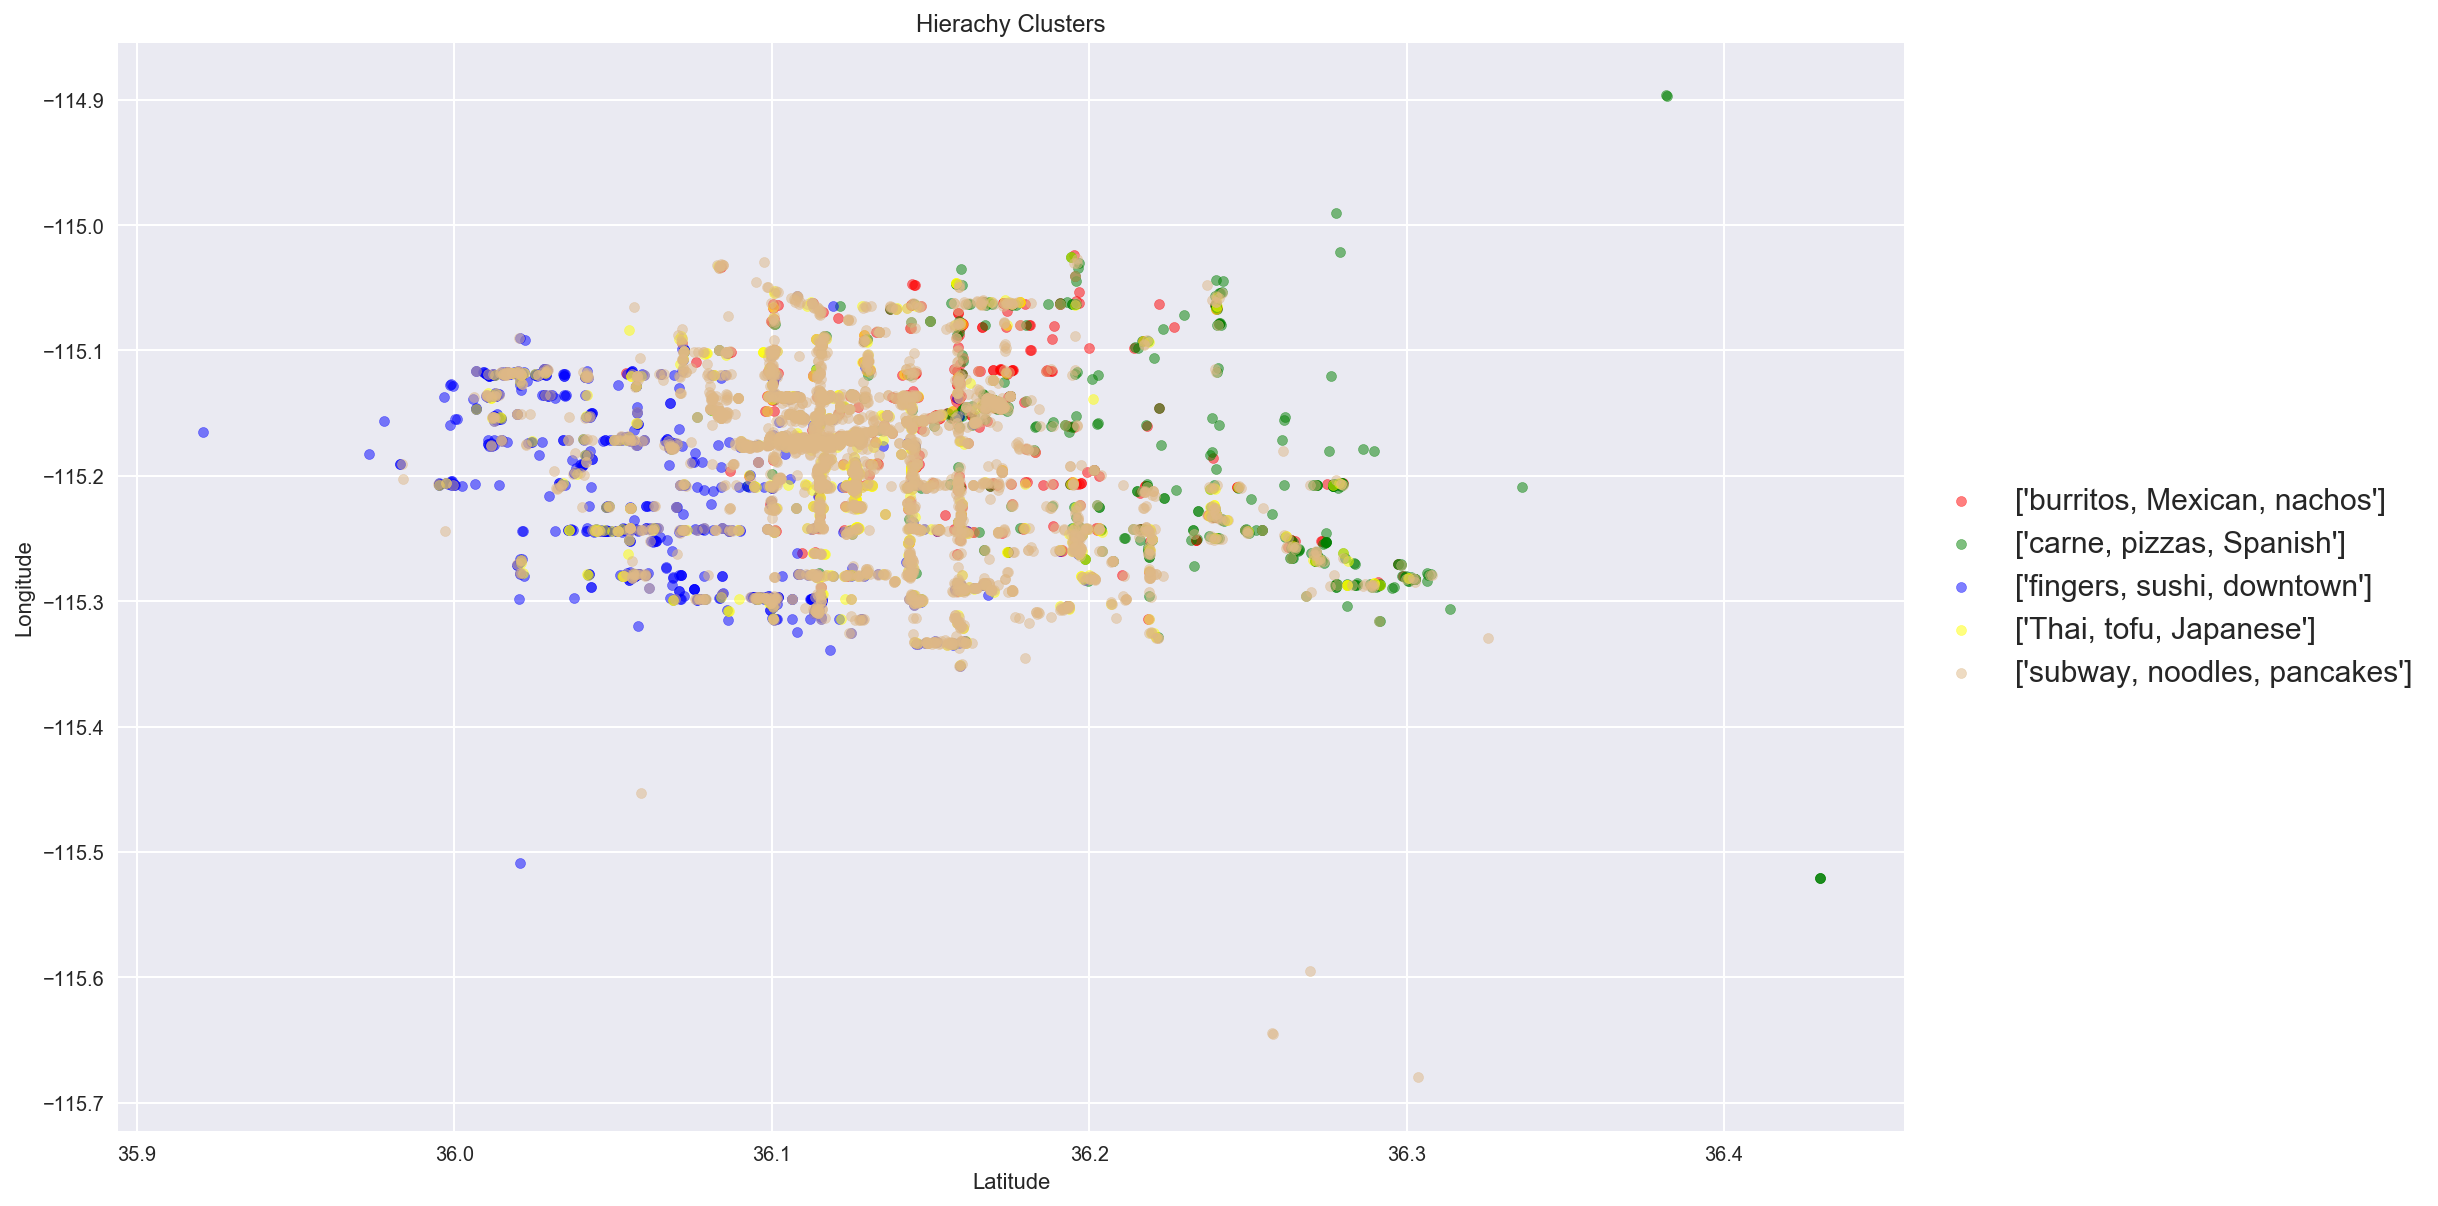

In [206]:
H_cluster100_top = [['burritos, Mexican, nachos'],['carne, pizzas, Spanish'],['fingers, sushi, downtown'],['Thai, tofu, Japanese'],['subway, noodles, pancakes']]
c = ['r', 'g', 'blue', 'yellow', 'burlywood','darkseagreen', 'beige', 'pink', 'orange','dimgray','brown']

plt.figure(figsize=(16,10))
for i in range(k_H100):
    plt.scatter(latitude[clusters100==i+1], longitude[clusters100==i+1], s=25, color=c[i],label=H_cluster100_top[i], alpha=0.5)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 15})
plt.title('Hierachy Clusters')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# GMM clusters

Text(0,0.5,'GMM Silhouette Score')

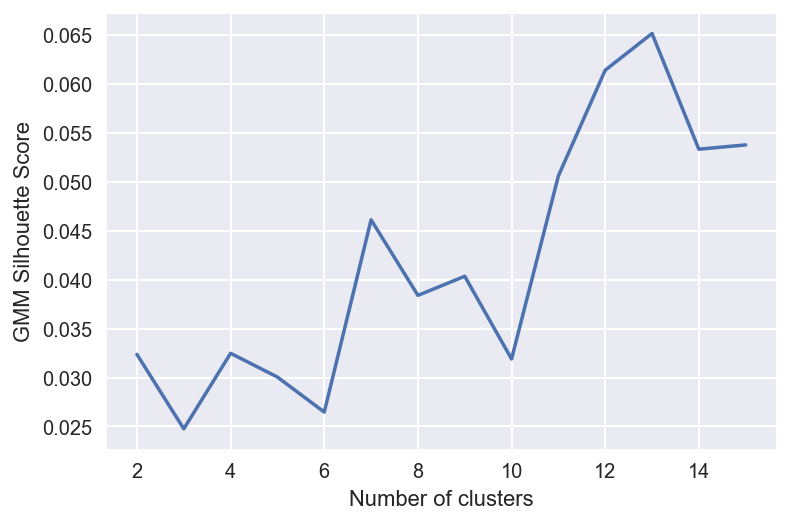

In [207]:
s = np.zeros(max_clusters+1)
for k in range(2,max_clusters+1):
    gmm = mixture.GaussianMixture(n_components=k, covariance_type='full')
    gmm.fit(feature100)
    y_pred = gmm.predict(feature100)
    s[k] = metrics.silhouette_score(feature100,y_pred,metric='euclidean')
plt.plot(range(2,len(s)),s[2:])
plt.xlabel('Number of clusters')
plt.ylabel('GMM Silhouette Score')

In [208]:
k_G100 = 5
gmm = mixture.GaussianMixture(n_components=k_G100, covariance_type='tied')
gmm.fit(feature100)
y_pred100 = gmm.predict(feature100)

G_dic100 = {}
for i in y_pred100:
    if i in G_dic100:
        G_dic100[i] += 1
    else:
        G_dic100[i] = 1
        
for i in range(k_G100):
    print('There are {} restautrants in cluster {}. '.format(G_dic100[i], i))

There are 451 restautrants in cluster 0. 
There are 3029 restautrants in cluster 1. 
There are 584 restautrants in cluster 2. 
There are 653 restautrants in cluster 3. 
There are 1182 restautrants in cluster 4. 


In [209]:
# Calculate the centroids in each cluster
cluster_G100 = {}
sum_G100 = []
G_centroids100 = []
sum_GG100 =  np.zeros(102)
for i in range(k_G100):
    cluster_G100[i] = np.array([feature100[j] for j in range(len(location)) if y_pred100[j] == i])
    for k in range(len(cluster_G100[i])):
        sum_GG100 = list(map(lambda x: x[0]+x[1], zip(sum_GG100, cluster_G100[i][k]))) 
    sum_G100.append(sum_GG100)
    center =  [(sum_GG100[j]/len(cluster_G100[i])) for j in range(len(sum_GG100))] 
    G_centroids100.append(center)

G_centroids100 = np.array(G_centroids100)
G_ori_centers100 = lsa.inverse_transform(G_centroids100[:,:100])
G_order_centroids100 = G_ori_centers100.argsort()[:, ::-1]

print("Top words in each cluster by using GMM method:")
print('')

# print out the top 50 words with largest weight in each cluster
for i in range(k_G100):
    print("Top 50 words in Cluster {}: ".format(i))
    for ind in G_order_centroids100[i, :50]:
        print(' %s' % terms100[ind], end='')
    print("")
    print("") 

Top words in each cluster by using GMM method:

Top 50 words in Cluster 0: 
 pizzas pepperoni hut dough driver oven pie knots topping calzone pizzeria mozzarella papa dominos york marinara sticks ny meatballs parmesan pies breadsticks stromboli fingers domino olives calzones supreme meatball buffalo alfredo answered caesars refund caesar philly chicago parm ricotta spaghetti hung inch cardboard lasagna carry doughy liter johns address drivers

Top 50 words in Cluster 1: 
 subway pizzas pepperoni court pie mac mcdonald refund driver dough dogs oven subs hash buffalo pancakes ribs cheeseburger mustard patty gravy rings ketchup sticks york fingers express philly pickles topping groupon downtown brunch mcdonalds vegan toasted cookies hawaiian patio panda mozzarella coke deli caesar shake ny apple website cheddar hut

Top 50 words in Cluster 2: 
 subway asada pizzas carne pepperoni mac court pie nachos dogs refund el guacamole ribs dough mcdonald driver tortillas tortilla oven truck gravy b

#### From top 50 words in each cluster, we can selects several key words as their labels.
#### Cluster 0 : pizzas, pie, meatballs
#### Cluster 1 : subway, pancakes, burger
#### Cluster 2 : nachos, Mexican, burrito
#### Cluster 3 : carne, fingers,  Chinese
#### Cluster 4 : sushi, noodles, curry

Text(0,0.5,'Longitude')

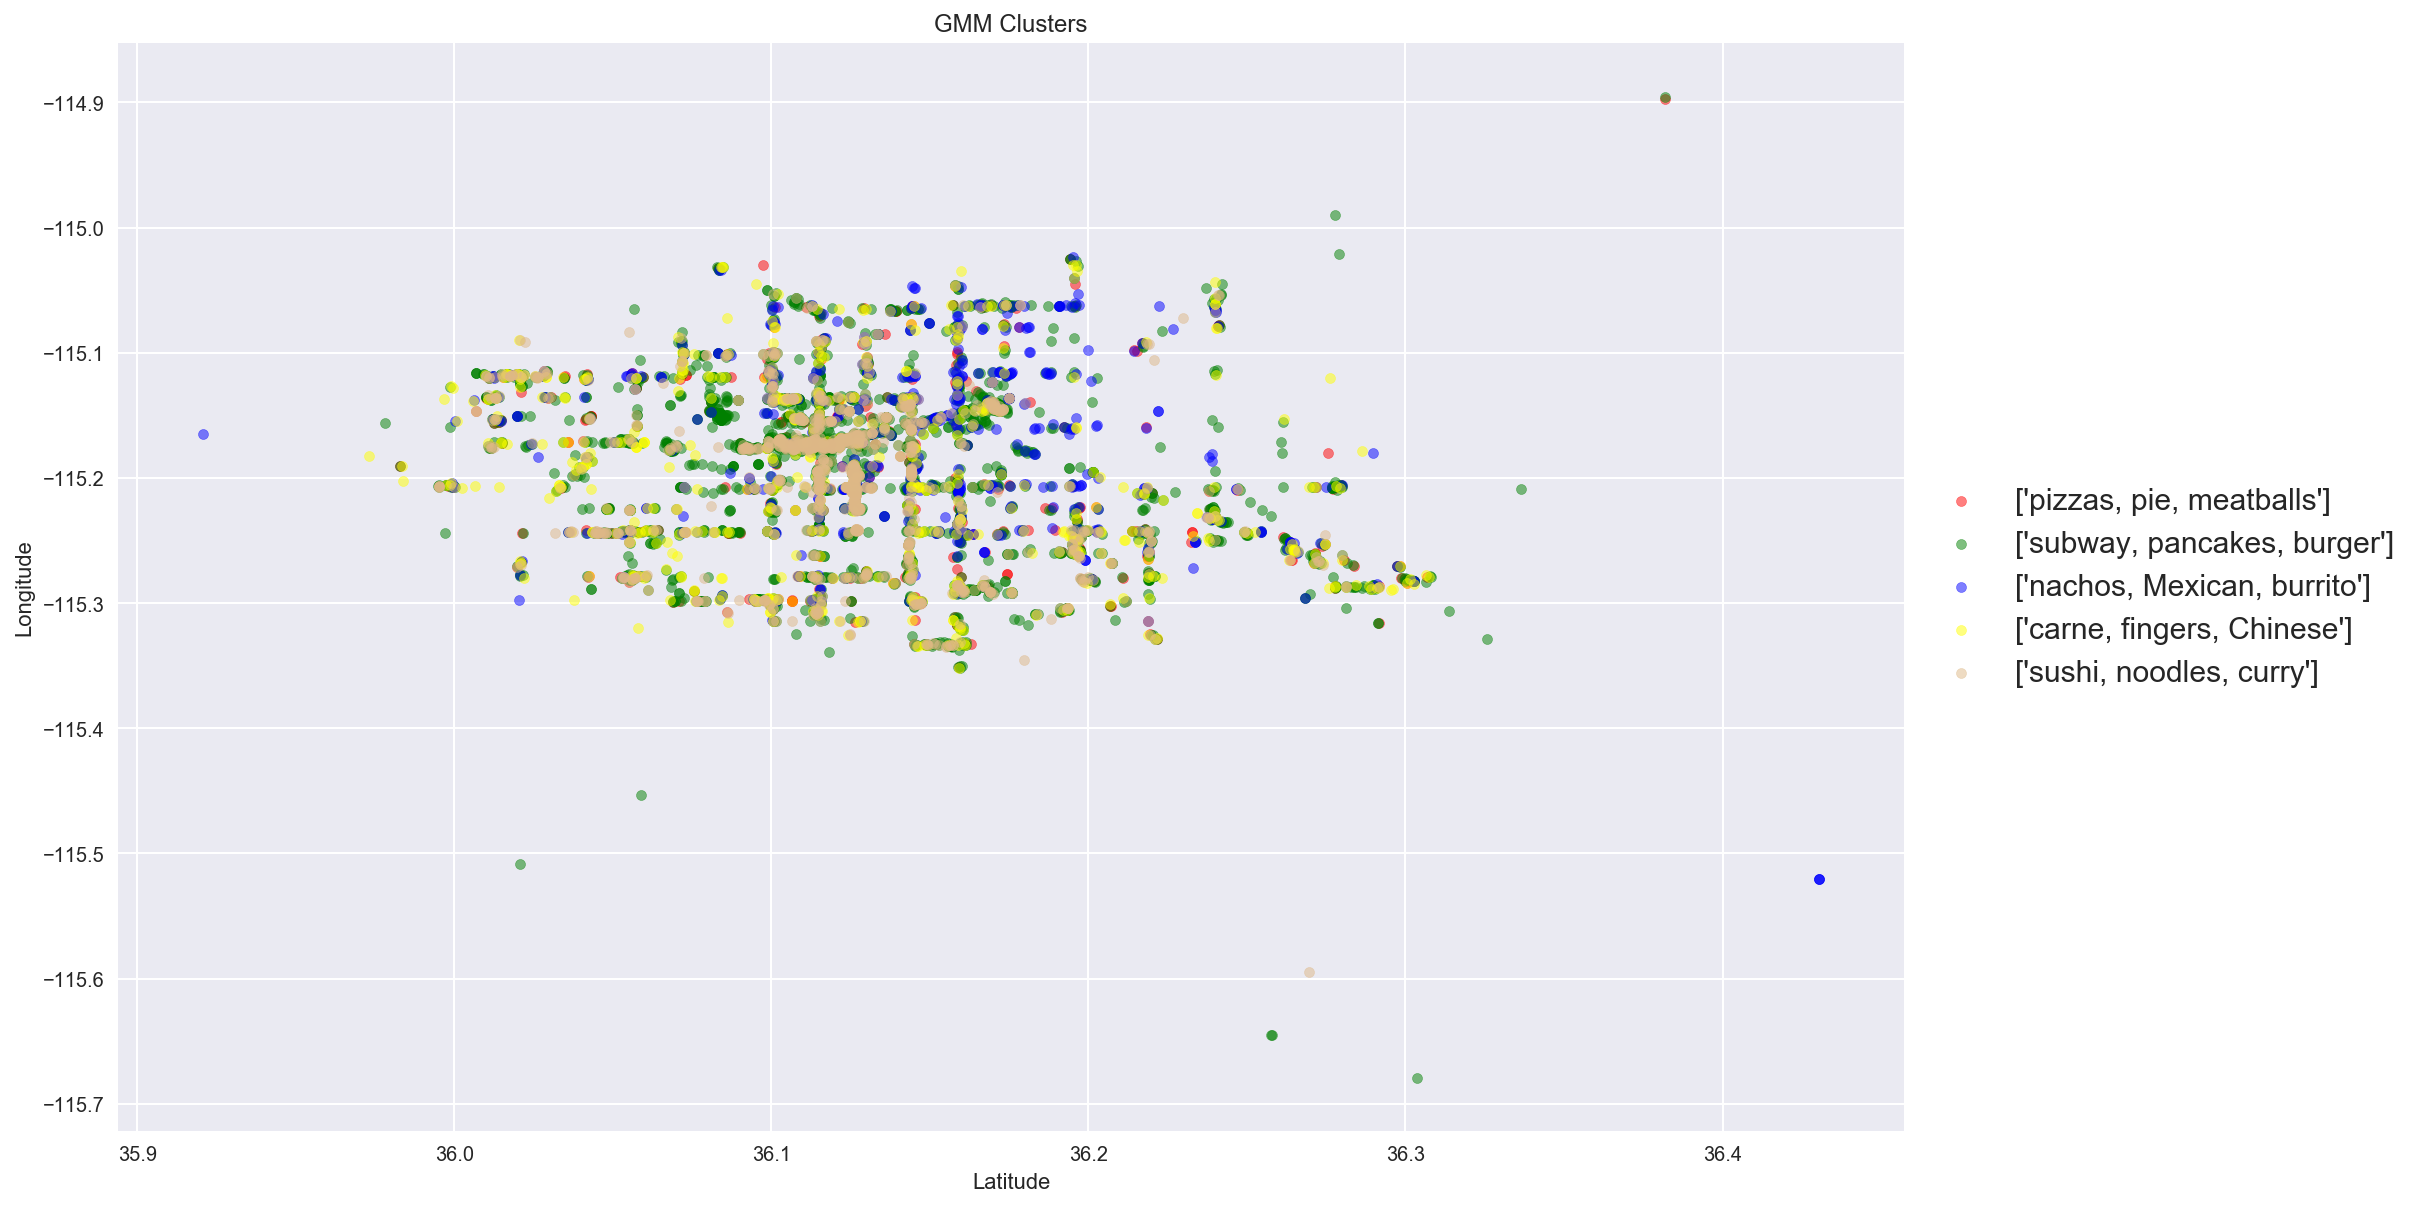

In [210]:
G_cluster100_top = [['pizzas, pie, meatballs'],['subway, pancakes, burger'],['nachos, Mexican, burrito'],['carne, fingers, Chinese'],['sushi, noodles, curry']]
c = ['r', 'g', 'blue', 'yellow', 'burlywood','darkseagreen', 'beige', 'pink', 'orange','dimgray','brown']

plt.figure(figsize=(16,10))
for i in range(k_G100):
    plt.scatter(latitude[y_pred100==i], longitude[y_pred100==i], s=25, color=c[i],label=G_cluster100_top[i], alpha=0.5)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 15})
plt.title('GMM Clusters')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# K=1000: first 1000 reviews per business

# K-Means++ clusters

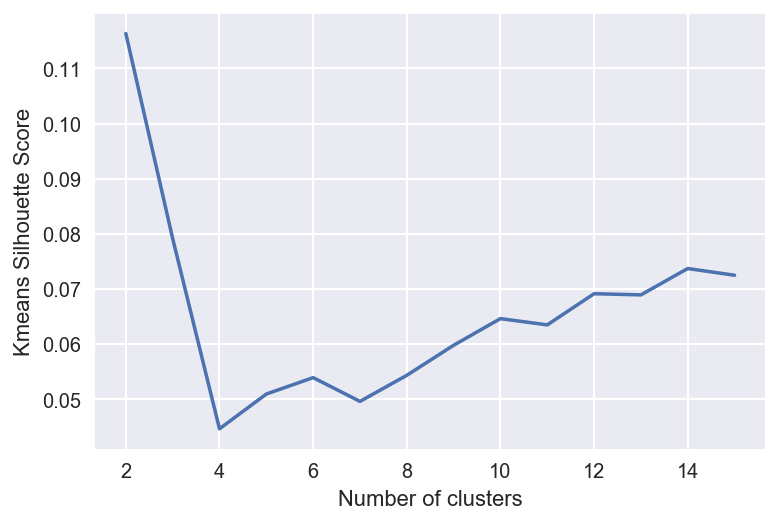

In [166]:
max_clusters = 15
s = np.zeros(max_clusters+1)

for k in range(2,max_clusters+1):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
    kmeans.fit_predict(feature1000)
    labels = kmeans.fit_predict(feature1000)
    s[k] = metrics.silhouette_score(feature1000,labels,metric='euclidean')

plt.plot(range(2,len(s)),s[2:])
plt.xlabel('Number of clusters')
plt.ylabel('Kmeans Silhouette Score')
plt.show()

In [216]:
# select k=5 to cluster
k_K1000 = 5

kmeans = KMeans(init='k-means++', n_clusters=k_K1000, n_init=10)
K_labels1000 = kmeans.fit_predict(feature1000)
K_centroids1000 = kmeans.cluster_centers_

K_dic1000 = {}
for i in K_labels1000:
    if i in K_dic1000:
        K_dic1000[i] += 1
    else:
        K_dic1000[i] = 1
        
# print(K_dic10)
for i in range(k_K1000):
    print('There are {} restautrants in cluster {}. '.format(K_dic1000[i], i))

There are 1130 restautrants in cluster 0. 
There are 1195 restautrants in cluster 1. 
There are 2081 restautrants in cluster 2. 
There are 1056 restautrants in cluster 3. 
There are 437 restautrants in cluster 4. 


In [217]:
K_centroids1000 = kmeans.cluster_centers_
K_ori_centers1000 = lsa.inverse_transform(K_centroids1000[:,:100])
K_order_centroids1000 = K_ori_centers1000.argsort()[:, ::-1]

print("Top words in each cluster by using K-means method:")
print('')

# print out the top 50 words with largest weight in each cluster
for i in range(k_K1000):
    print("Top 50 words in Cluster {}: ".format(i))
    for ind in K_order_centroids1000[i, :50]:
#         print('Top category is {}'.format(terms10[ind]))
        print(' %s' % terms1000[ind], end='')
    print("")
    print("") 

Top words in each cluster by using K-means method:

Top 50 words in Cluster 0: 
 pizzas subway truck pepperoni fremont mcdonald dogs el driver pancakes hash burritos coupons cheeseburger teriyaki subs hut nachos philly gas patty bartenders machines hawaiian pickles cookies cars tortillas games browns shake chow mcdonalds panda spanish wing brisket parmesan slaw chipotle meatball cheddar catfish tenders hamburger curry mozzarella meatballs nuggets charleston

Top 50 words in Cluster 1: 
 filet brunch calamari patio sliders pancakes lamb asparagus steaks bartenders hash parmesan scallops mignon truffle ribeye steakhouse creme martini outdoor bloody omelet lounge benedict classy romantic smoked mozzarella oysters bass seared apps vodka olive basket champagne private wedding anniversary mary pudding patty basil omelette ahi wines meatballs impeccable waffles clams

Top 50 words in Cluster 2: 
 court subway pizzas tofu pepperoni curry panda korean chow teriyaki dogs mein mcdonald subs drive

#### From top 50 words in each cluster, we can selects several key words as their labels.
#### Cluster 0 : pizzas, pancakes, burritos
#### Cluster 1 : brunch, steaks, meatballs
#### Cluster 2 : subways, Chinese, Korean
#### Cluster 3 : nachos, Mexcian, Japanese
#### Cluster 4 : salsas, Spanish, burger

Text(0,0.5,'Longitude')

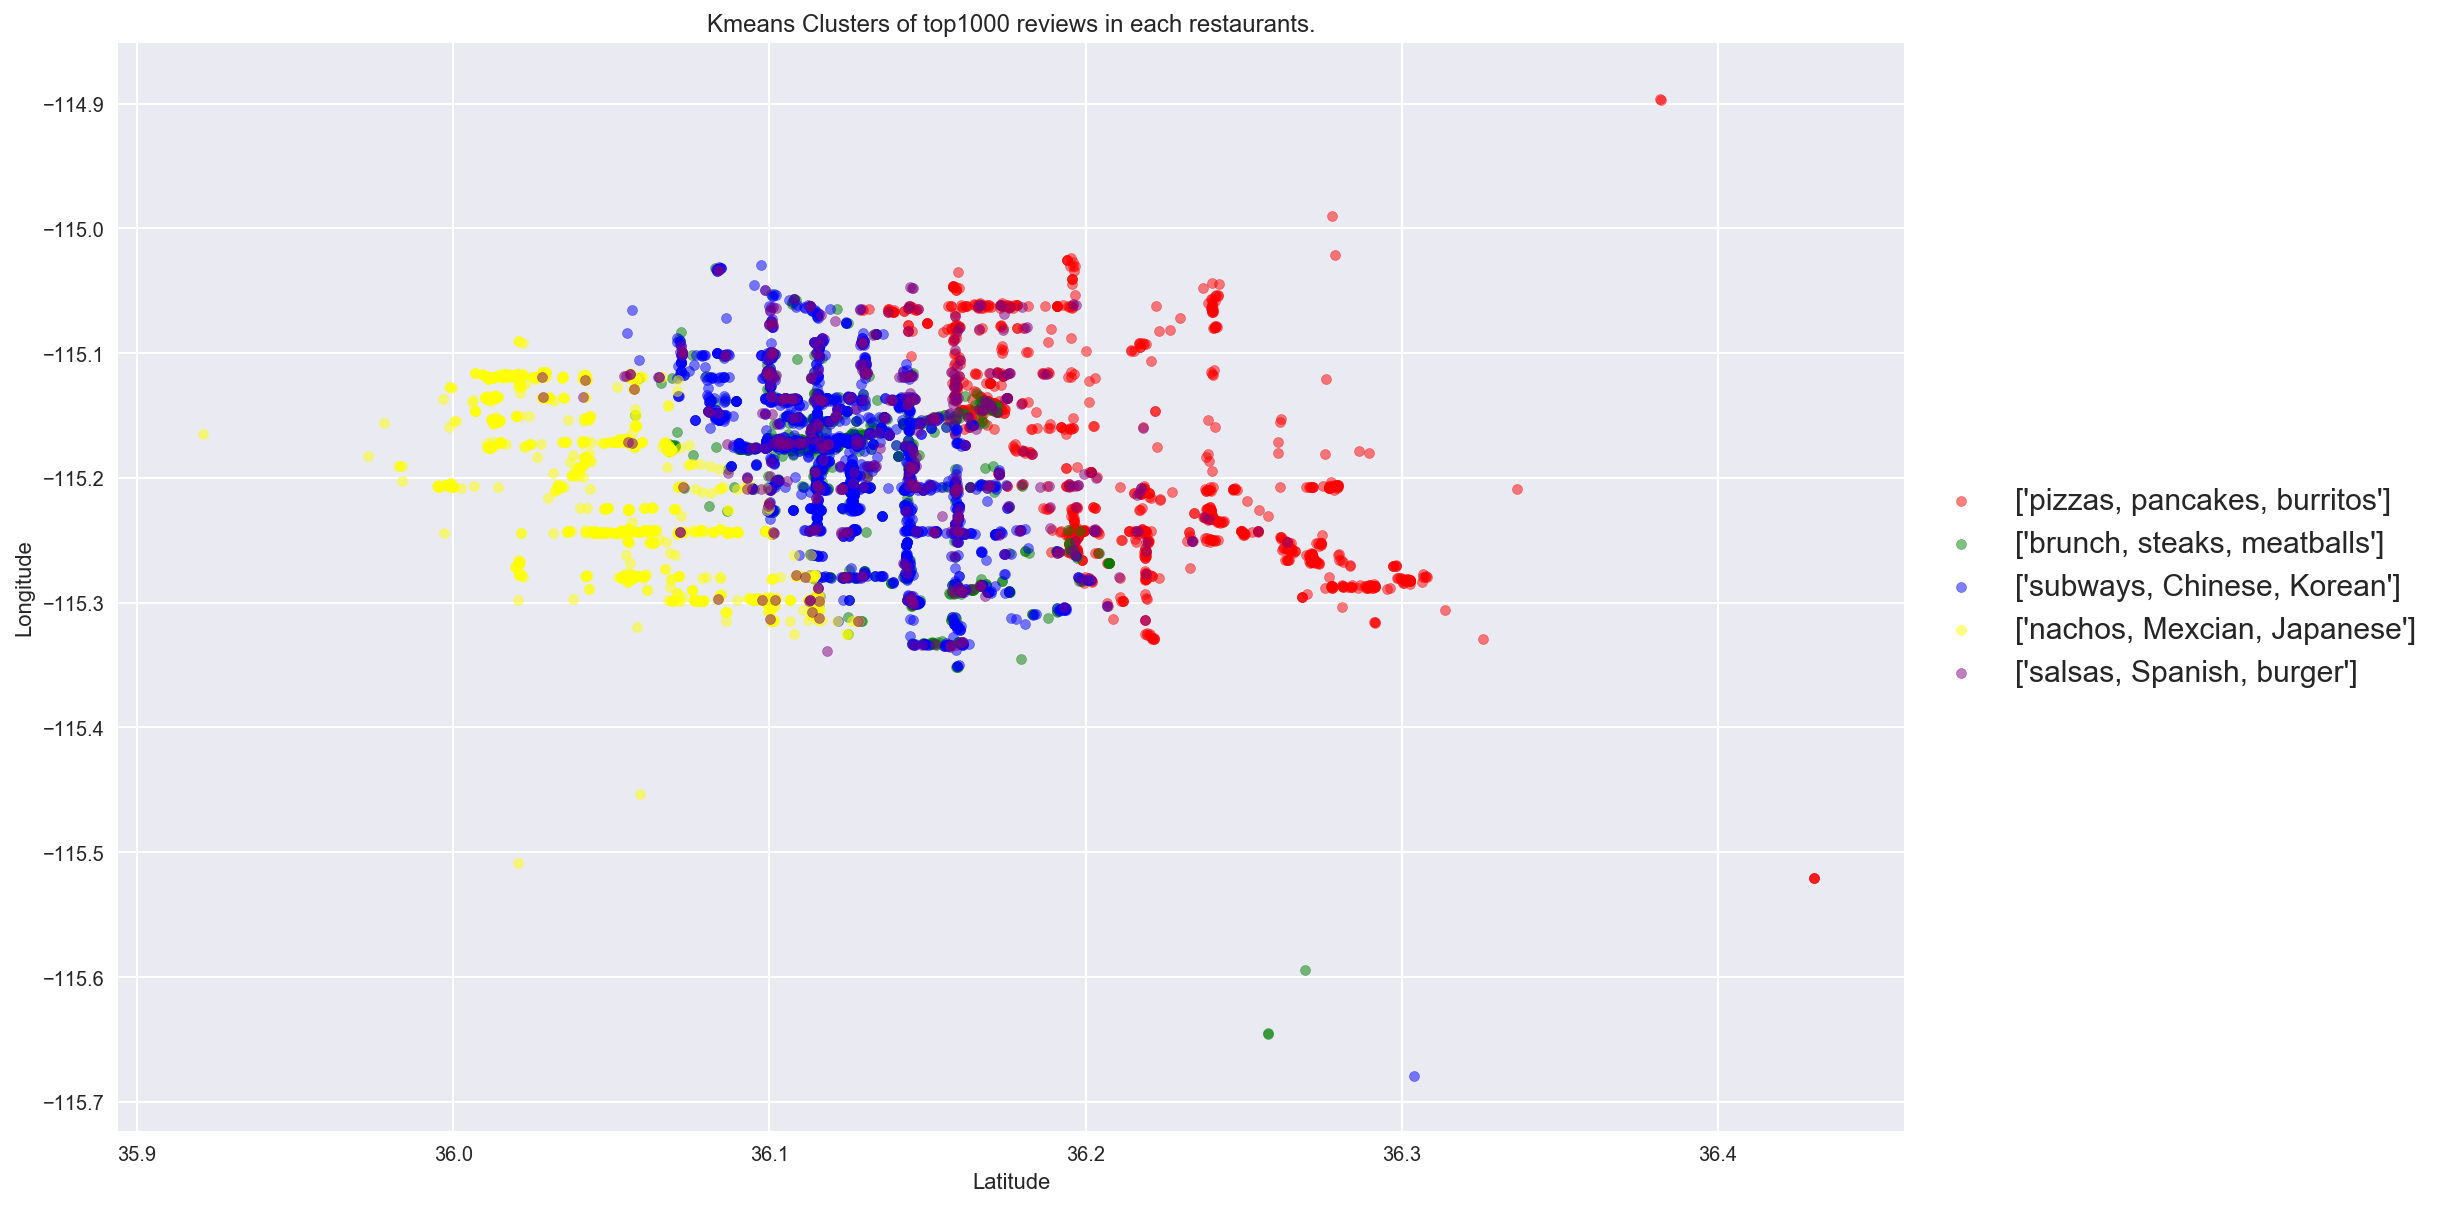

In [218]:
K_cluster1000_top = [['pizzas, pancakes, burritos'],['brunch, steaks, meatballs'],['subways, Chinese, Korean'],['nachos, Mexcian, Japanese'],['salsas, Spanish, burger']]

c = ['r', 'g', 'blue', 'yellow', 'purple','darkseagreen','dimgray' ,  'pink','brown','orange','beige','darkturquoise']

plt.figure(figsize=(16,10))

for i in range(k_K1000):
    plt.scatter(latitude[K_labels1000==i], longitude[K_labels1000==i], s=25, color=c[i], label=K_cluster1000_top[i] ,alpha=0.5)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 15})
plt.title('Kmeans Clusters of top1000 reviews in each restaurants.')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# Hierarchical clusters

Text(0,0.5,'Hierarchy Silhouette Score')

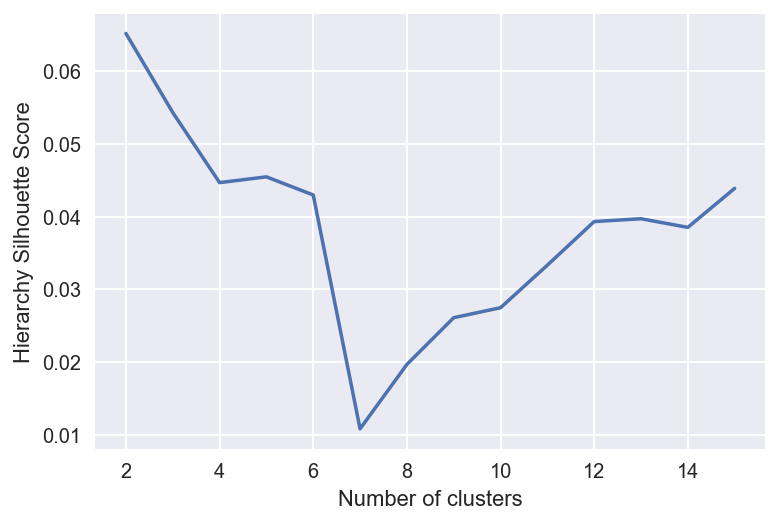

In [219]:
H_Z1000 = hierarchy.linkage(feature1000, method='ward', metric='euclidean')

s = np.zeros(max_clusters+1)
for k in range(2,max_clusters+1):
    clusters = hierarchy.fcluster(H_Z1000, k, criterion='maxclust')
    s[k] = metrics.silhouette_score(feature1000,clusters,metric='euclidean')
plt.plot(range(2,len(s)),s[2:])
plt.xlabel('Number of clusters')
plt.ylabel('Hierarchy Silhouette Score')

In [220]:
k_H1000 = 5
clusters1000 = hierarchy.fcluster(H_Z1000, k_H1000, criterion='maxclust')

H_dic1000 = {}
for i in clusters1000:
    if i in H_dic1000:
        H_dic1000[i] += 1
    else:
        H_dic1000[i] = 1
        
for i in range(1,k_H1000+1):
    print('There are {} restautrants in cluster {}. '.format(H_dic1000[i], i))

There are 1046 restautrants in cluster 1. 
There are 420 restautrants in cluster 2. 
There are 2555 restautrants in cluster 3. 
There are 538 restautrants in cluster 4. 
There are 1340 restautrants in cluster 5. 


In [221]:
# Calculate the centroids in each cluster
cluster_H1000 = {}
sum_H1000 = []
H_centroids1000 = []
sum_HH1000 =  np.zeros(102)
for i in range(k_H1000):
    cluster_H1000[i] = np.array([feature1000[j] for j in range(len(location)) if clusters1000[j] == i+1])
    for k in range(len(cluster_H1000[i])):
        sum_HH1000 = list(map(lambda x: x[0]+x[1], zip(sum_HH1000, cluster_H1000[i][k]))) 
    sum_H1000.append(sum_HH1000)
    center =  [(sum_HH1000[j]/len(cluster_H1000[i])) for j in range(len(sum_HH1000))] 
    H_centroids1000.append(center)

H_centroids1000 = np.array(H_centroids1000)
H_ori_centers1000 = lsa.inverse_transform(H_centroids1000[:,:100])
H_order_centroids1000 = H_ori_centers1000.argsort()[:, ::-1]

print("Top words in each cluster by using Hierarchical method:")
print('')

# print out the top 50 words with largest weight in each cluster
for i in range(k_H1000):
    print("Top 50 words in Cluster {}: ".format(i+1))
    for ind in H_order_centroids1000[i, :50]:
        print(' %s' % terms1000[ind], end='')
    print("")
    print("") 

Top words in each cluster by using Hierarchical method:

Top 50 words in Cluster 1: 
 tofu curry mein chow panda teriyaki japanese tempura pad korean china wonton pho mongolian miso chinatown kung pao duck ayce dumplings katsu sashimi ramen seaweed vietnamese boba wontons sesame nigiri hawaiian udon rangoon stir msg eggplant poke kimchi bento sake filipino squid walnut edamame sprouts tom kalbi panang stickers yellowtail

Top 50 words in Cluster 2: 
 pizzas pepperoni tofu curry mein chow panda teriyaki japanese driver tempura pad korean hut china pho wonton hawaiian mongolian miso chinatown kung eggplant pao ayce duck dumplings katsu sashimi knots ramen basil seaweed sesame vietnamese boba calzone wontons nigiri court meatballs udon rangoon stir sake calamari msg dominos squid poke

Top 50 words in Cluster 3: 
 pizzas pepperoni curry tofu court bartenders philly lamb chow calamari panda teriyaki eggplant mein japanese groupon driver hawaiian mozzarella dogs games parmesan korean pancak

#### From top 50 words in each cluster, we can selects several key words as their labels.
#### Cluster 1 : curry, Chinese, Japanese
#### Cluster 2 : pizzas, tofu, Korean
#### Cluster 3 : pancakes, meatballs, brunch
#### Cluster 4 : nachos, burritos, Mexican
#### Cluster 5 : pizzas, subway, burgers

Text(0,0.5,'Longitude')

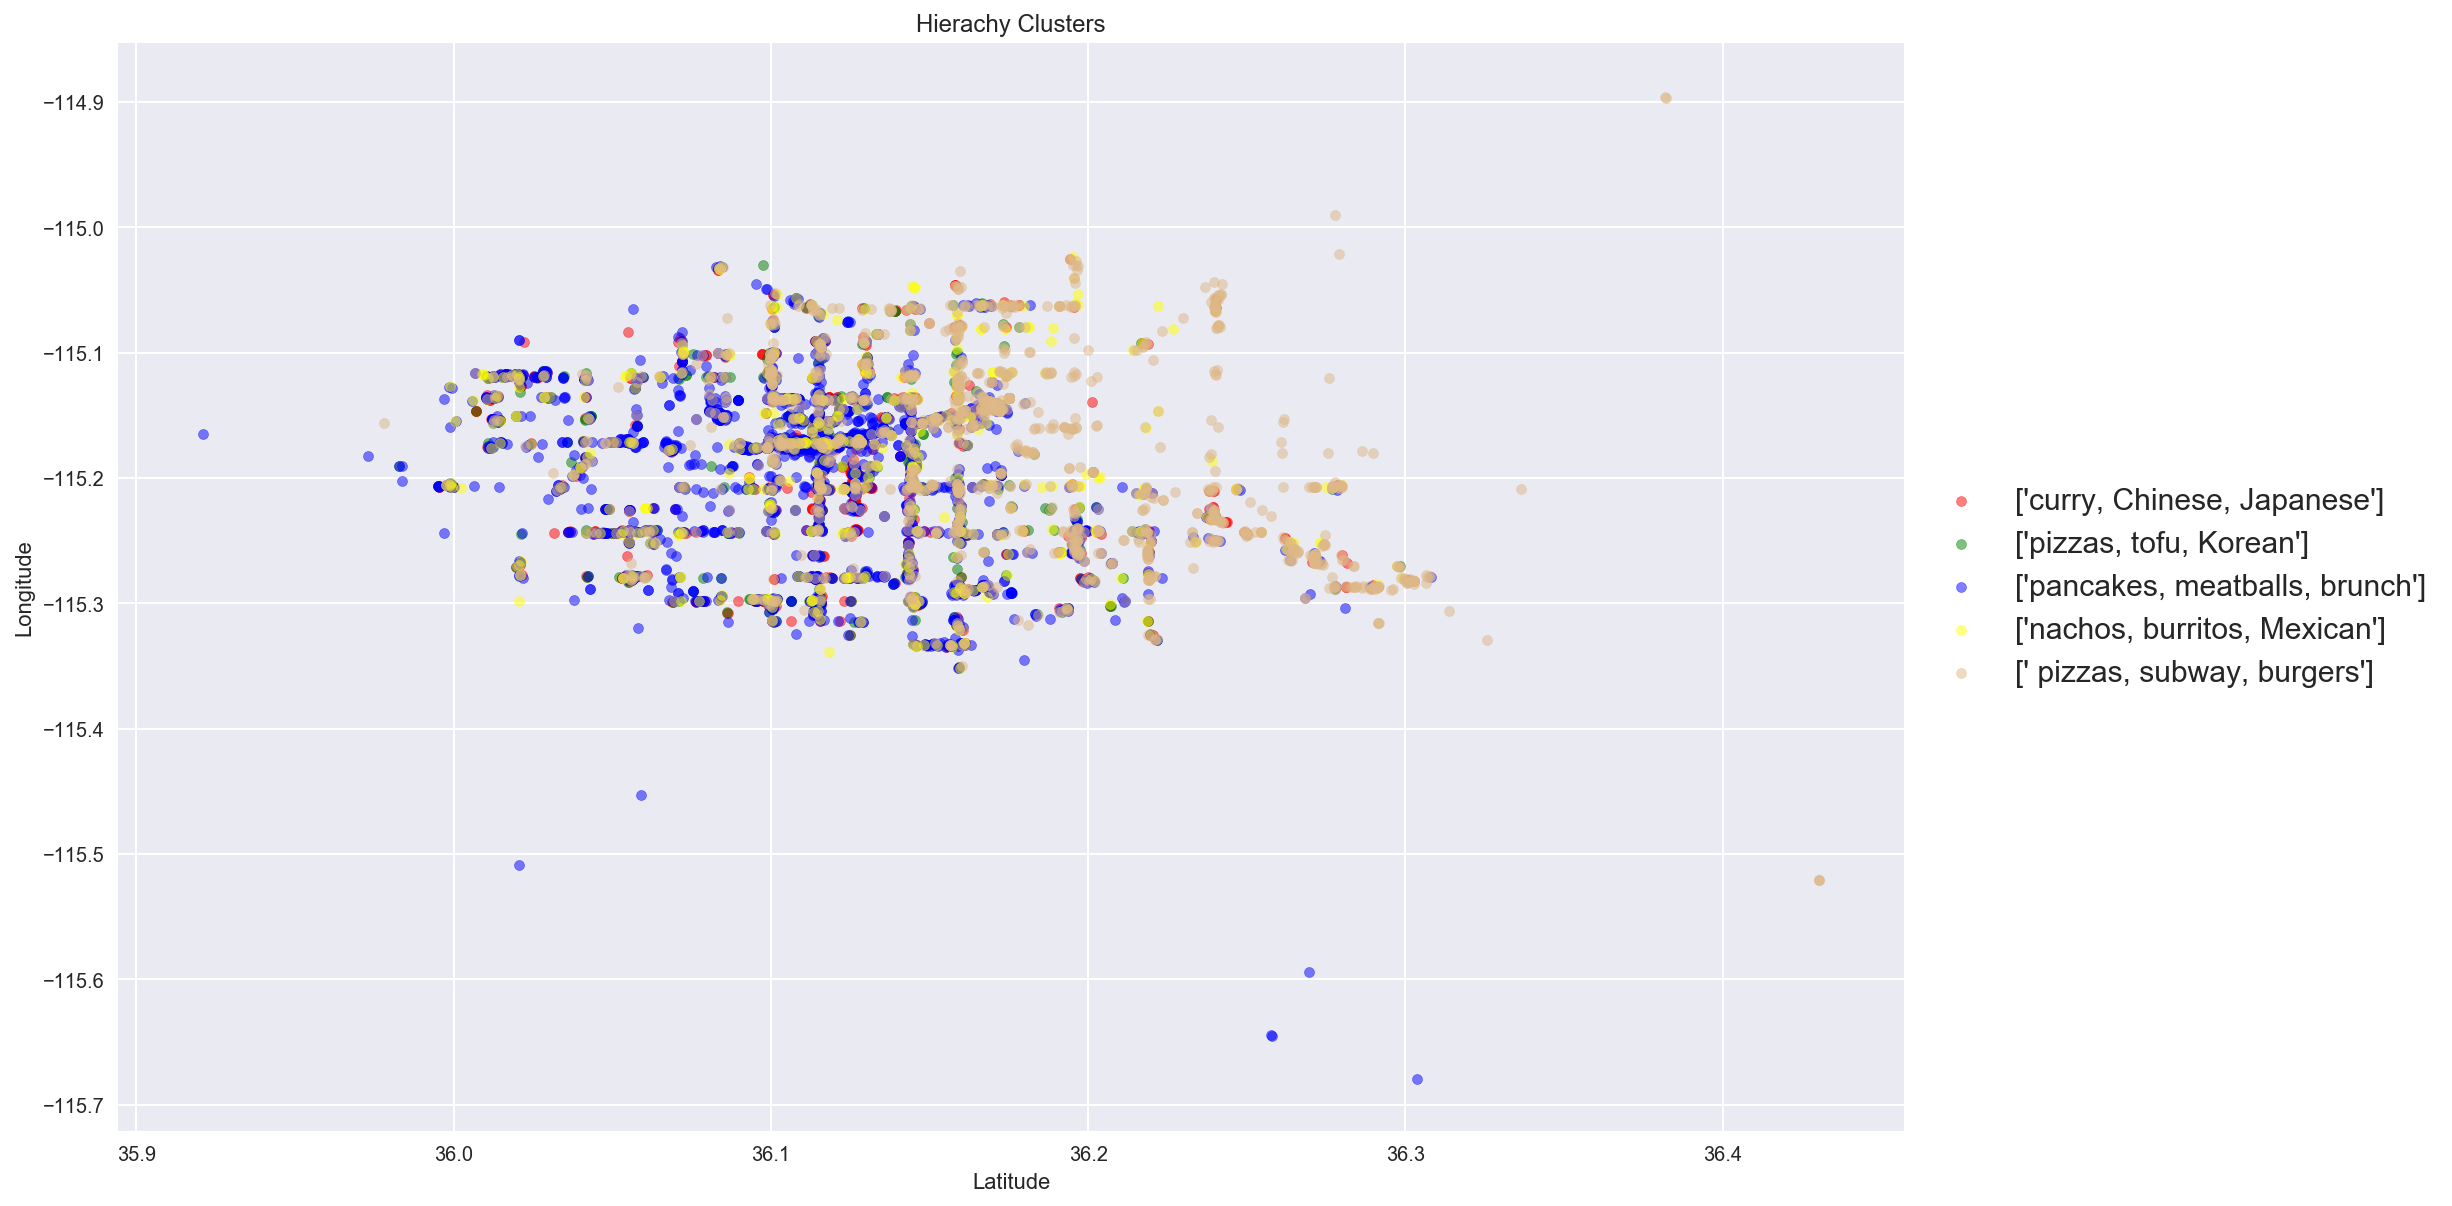

In [222]:
H_cluster1000_top = [['curry, Chinese, Japanese'],['pizzas, tofu, Korean'],['pancakes, meatballs, brunch'],['nachos, burritos, Mexican'],[' pizzas, subway, burgers']]
c = ['r', 'g', 'blue', 'yellow', 'burlywood','darkseagreen', 'beige', 'pink', 'orange','dimgray','brown']

plt.figure(figsize=(16,10))
for i in range(k_H100):
    plt.scatter(latitude[clusters1000==i+1], longitude[clusters1000==i+1], s=25, color=c[i],label=H_cluster1000_top[i], alpha=0.5)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 15})
plt.title('Hierachy Clusters')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# GMM clusters

Text(0,0.5,'GMM Silhouette Score')

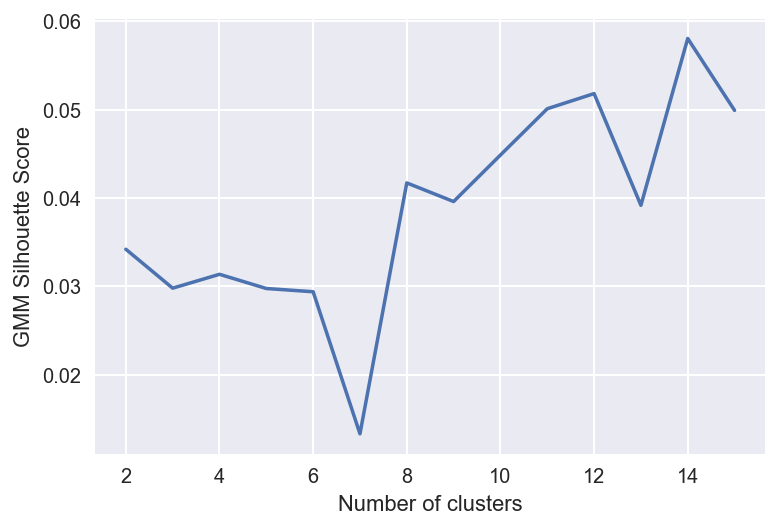

In [179]:
s = np.zeros(max_clusters+1)
for k in range(2,max_clusters+1):
    gmm = mixture.GaussianMixture(n_components=k, covariance_type='full')
    gmm.fit(feature1000)
    y_pred = gmm.predict(feature1000)
    s[k] = metrics.silhouette_score(feature1000,y_pred,metric='euclidean')
plt.plot(range(2,len(s)),s[2:])
plt.xlabel('Number of clusters')
plt.ylabel('GMM Silhouette Score')

In [223]:
k_G1000 = 5
gmm = mixture.GaussianMixture(n_components=k_G1000, covariance_type='tied')
gmm.fit(feature1000)
y_pred1000 = gmm.predict(feature1000)

G_dic1000 = {}
for i in y_pred1000:
    if i in G_dic1000:
        G_dic1000[i] += 1
    else:
        G_dic1000[i] = 1
        
for i in range(k_G1000):
    print('There are {} restautrants in cluster {}. '.format(G_dic1000[i], i))

There are 531 restautrants in cluster 0. 
There are 668 restautrants in cluster 1. 
There are 471 restautrants in cluster 2. 
There are 3663 restautrants in cluster 3. 
There are 566 restautrants in cluster 4. 


In [224]:
# Calculate the centroids in each cluster
cluster_G1000 = {}
sum_G1000 = []
G_centroids1000 = []
sum_GG1000 =  np.zeros(102)
for i in range(k_G1000):
    cluster_G1000[i] = np.array([feature1000[j] for j in range(len(location)) if y_pred1000[j] == i])
    for k in range(len(cluster_G1000[i])):
        sum_GG1000 = list(map(lambda x: x[0]+x[1], zip(sum_GG1000, cluster_G1000[i][k]))) 
    sum_G1000.append(sum_GG1000)
    center =  [(sum_GG1000[j]/len(cluster_G1000[i])) for j in range(len(sum_GG1000))] 
    G_centroids1000.append(center)

G_centroids1000 = np.array(G_centroids1000)
G_ori_centers1000 = lsa.inverse_transform(G_centroids1000[:,:100])
G_order_centroids1000 = G_ori_centers1000.argsort()[:, ::-1]

print("Top words in each cluster by using GMM method:")
print('')

# print out the top 50 words with largest weight in each cluster
for i in range(k_G1000):
    print("Top 50 words in Cluster {}: ".format(i))
    for ind in G_order_centroids1000[i, :50]:
        print(' %s' % terms1000[ind], end='')
    print("")
    print("") 

Top words in each cluster by using GMM method:

Top 50 words in Cluster 0: 
 filet steakhouse steaks mignon calamari ravioli veal asparagus ribeye lamb olive scallops spaghetti parmesan romantic risotto creme meatballs clams tiramisu oysters lasagna bisque bass anniversary wines alfredo legs truffle basket scampi gnocchi brulee classy martini chops champagne steakhouses parm brunch garden eggplant balsamic mussels mozzarella caprese seared courses prosciutto elegant

Top 50 words in Cluster 1: 
 bartenders nachos machines burritos poker gaming filet games chipotle steaks pt calamari video del football smoothie hawaiian steakhouse teriyaki mignon asparagus smoking tvs gambling sliders spaghetti pub smoothies meatballs ribeye ahi lamb ravioli lounge veal parmesan pts vodka scallops quesadilla olive poke comped macaroni dive comp romantic risotto creme clams

Top 50 words in Cluster 2: 
 pizzas pepperoni bartenders hut meatballs mozzarella parmesan driver marinara knots machines spaghetti

#### From top 50 words in each cluster, we can selects several key words as their labels.
#### Cluster 0 : steaks, meatballs, wines
#### Cluster 1 : nachos, Mexican, Hawaiian
#### Cluster 2 : pizzas, burritos, spaghetti
#### Cluster 3 : subway, curry, burgers
#### Cluster 4 : carne, Korean, Japanese

Text(0,0.5,'Longitude')

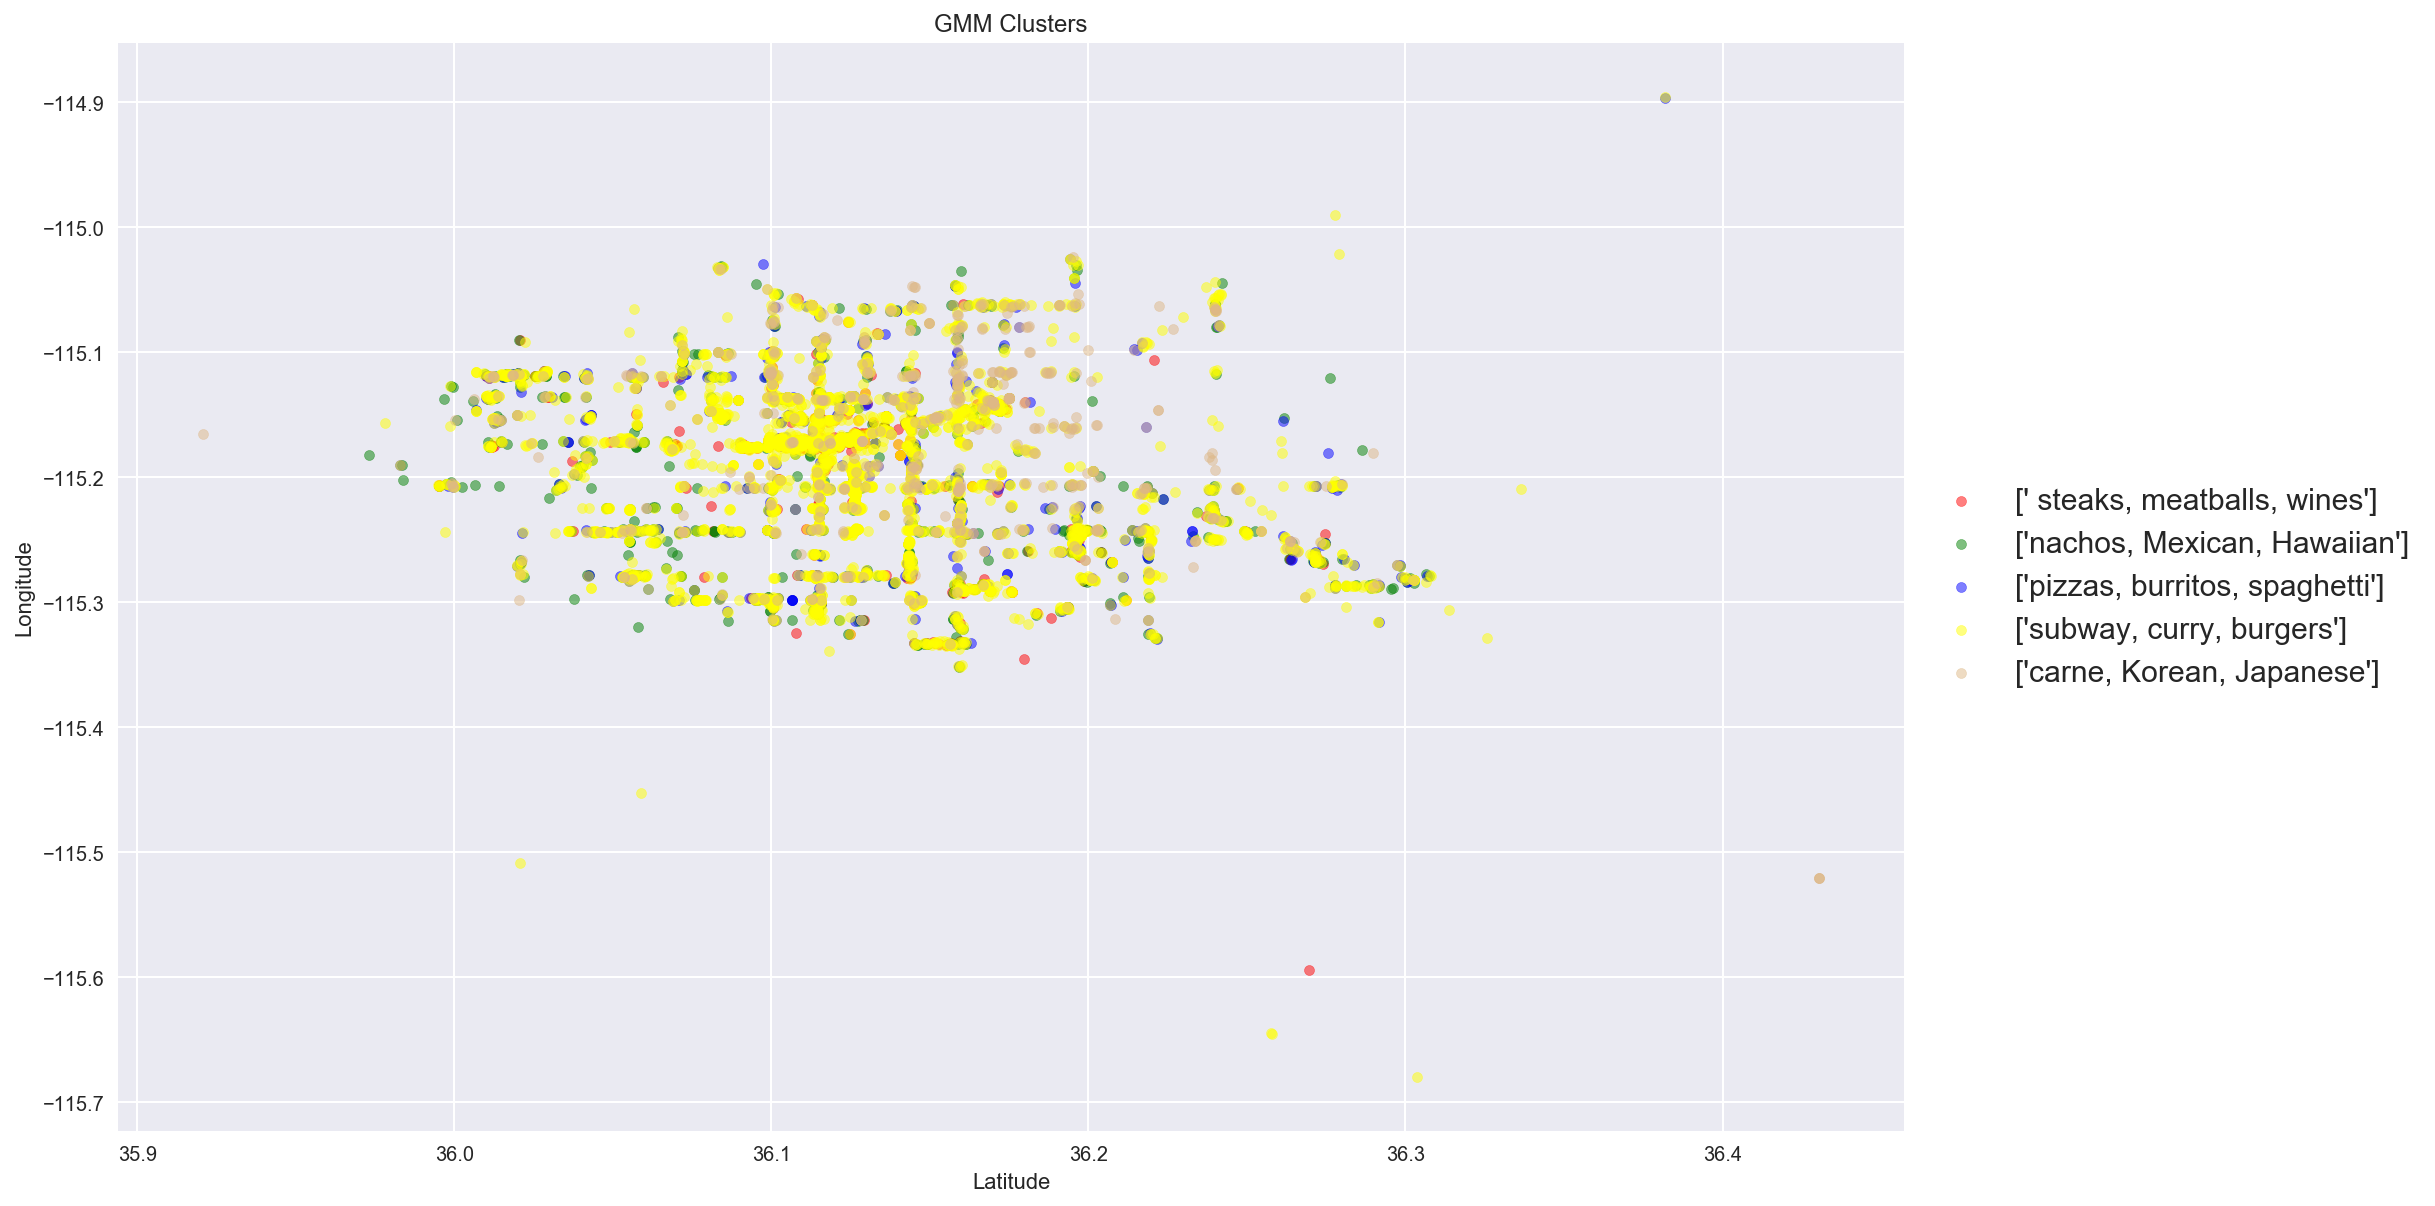

In [225]:
G_cluster1000_top = [[' steaks, meatballs, wines'],['nachos, Mexican, Hawaiian'],['pizzas, burritos, spaghetti'],['subway, curry, burgers'],['carne, Korean, Japanese']]
c = ['r', 'g', 'blue', 'yellow', 'burlywood','darkseagreen', 'beige', 'pink', 'orange','dimgray','brown']

plt.figure(figsize=(16,10))
for i in range(k_G1000):
    plt.scatter(latitude[y_pred1000==i], longitude[y_pred1000==i], s=25, color=c[i],label=G_cluster1000_top[i], alpha=0.5)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 15})
plt.title('GMM Clusters')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

What observations can you make regarding the different $k$ values and clusterings? We are expecting comments on the labels of each cluster for the different $k$, on the districts created, on the results of each clustering e.t.c. In general, feel free to report any interesting findings you made. **(2 pts)**

### Findings

1. It took me nearly 5 hours to run stemming of 100 or 1000 top reivews. So I gave up, only use the words which were not stemmed...
2. When k=10, by using the stemmed information, we can get more precise high frequency key words in the all reviews because we eliminate the noises from the words endings (That's why "Mexican" frequency is much less in k=100 and k=1000 than k=10)
3. When k becomes larger, the distribution of clusters weight becomes more even and top key words has less noise.
4. From the scatter figures, the GMM method has most overlapping clusters.
5. Key words about Fast food tend to be high frequency key words in each clusters. 

----------